# **Lending Club Case Study**

**Summary**
This case study focuses on applying Exploratory Data Analysis (EDA) techniques to understand the risk associated with lending in the banking and financial services sector. The objective is to analyze a dataset of past loan applicants to identify patterns and factors that influence the likelihood of loan defaults. The consumer finance company at the center of this analysis is interested in minimizing financial losses by improving its decision-making process in loan approvals. By identifying key indicators of default, the company aims to manage its risk exposure and reduce credit loss.

**Problem Statement**
The consumer finance company must balance two key risks when making loan approval decisions: rejecting applicants who would repay the loan, thus losing potential business, and approving applicants who are likely to default, which could lead to significant financial losses. The goal of this analysis is to use EDA to uncover the factors that can predict loan default, allowing the company to better assess the risk profile of applicants. This knowledge will enable the company to make data-driven decisions to either reject, modify, or accept loan applications, ultimately reducing credit loss and improving financial performance.

Below is a index of the analysis steps that are done this this notebook.

Analysis Steps:

* Reading Data
* Data wrangling
  * Handle missing rows
  * Handle missing data from column prespective
  * Check for Duplicates
  * Remove single-valued columns
  * Filter data
  * Select columns based of business knowledge
  * Cleaning columns and correcting data types
  * Handle Outliers
* Univariate Analysis
  * Define functions
    * Define Univariate Analysis FUnction
    * Define Function for Segmentation
    * Define Function for Segmented Univariate Analysis
  * Analyse Categorical Variables
    * Univariate Analysis
  * Analyse Numeric Variables
    * Univariate Analysis
    * Segmented Univariate Analysis
* Bivariate Analysis
  * Define functions
    * Define function for Bivariate Categorical Variable analysis
    * Define function for segmentation
    * Define function for Bivariate analysis of Numeric Variables
  * Analyse Categorical attributes
    * Bivariate analysis
  * Analyse Numeric Attributes
    * Bivariate analysis
    * Bivariate abalysis after binning
* Correlation and heat map
* Multivariate Analysis
  * Investigate defaults for loans issued around holidays




# Initial housekeeping

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [200]:
#Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

In [201]:
# Set Pandas Display Options

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [202]:
#set colour palette
palette={'Fully Paid': '#92D050', 'Charged Off': '#FF0000'}

# Loading and Inspecting Data

Load the dataset and display the first few rows to understand its structure. Check the data types and basic statistics for each column.

In [203]:
df = pd.read_csv('loan.csv')
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [204]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

**File contains 111 columns and 39717 rows**

In [205]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [206]:
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,26526,14,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,210,18641,2184,597,7099,370,977,39717,1256,1125,10308,39717


# Data Wrangling

Description: Identify missing values in the dataset. Decide on appropriate strategies, such as removing rows/columns with excessive missing data or imputing missing values.

## Handle missing values from Rows prespective

Check how many rows are entirely NULL

In [207]:
print(df[df.isnull().all(axis=1)].shape[0], "rows have all null values")


0 rows have all null values


There are no rows that are entirely NULL


Check percentage of NULL values in each row

In [208]:
# Calculate the number of null values in each row
null_counts = df.isnull().sum(axis=1)
# Calculate the percentage of null values in each row
null_percentage = (null_counts / len(df.columns)) * 100

for threshold in [25, 50, 60, 75, 100]:
  rows_with_threshold_nulls = len(null_percentage[null_percentage >= threshold])
  print(f"Number of rows with more than {threshold}% null values: {rows_with_threshold_nulls}")


Number of rows with more than 25% null values: 39717
Number of rows with more than 50% null values: 38936
Number of rows with more than 60% null values: 0
Number of rows with more than 75% null values: 0
Number of rows with more than 100% null values: 0


There are no rows with more than 60% NULL values. Hence no action needed for now. But we will again check for this after NULLs from a column prespective are addressed.

## Define NullColReport Function

Analyze missing values from a column perspective by calculating the percentage of missing data for each column. This analysis should be repeated after applying different techniques to handle missing values. Define a function to automate this process for easy reuse.

In [209]:
def nullColReport(x, return_cols=False):
  """Generates a report of null values in a Pandas DataFrame.
  Prints the total number of columns with null values,
  the number of columns with null values,
  the percentage of columns with null values, and a sorted list of columns
  with their corresponding null value percentages.
  Created by - KK (Krishna Kumar Sankaran Kutty)

  Args:
    x: Pandas DataFrame.
    return_cols: Boolean. If True, returns a Series of columns with null
                 value percentages, sorted in descending order.
                 Defaults to False.

  Returns:
    If return_cols is True, returns a Pandas Series of columns with null value
    percentages. Otherwise, returns None.
  """
  # Calculate total number of Columns
  print('Total number of columns: ', len(x.columns))

  # Calculate the number of null values in each column
  null_counts_cols = x.isnull().sum()

  # Calculate the number of columns with null values
  print('Number of columns with null values: ', len(null_counts_cols[null_counts_cols > 0]))

  # Calculate the percentage of columns with null values
  percent_cols_with_nulls = (len(null_counts_cols[null_counts_cols > 0]) / len(x.columns)) * 100
  print(f"Percentage of columns with null values: {percent_cols_with_nulls:.2f}%")

  # Calculate the percentage of null values in each column
  null_percentage_each_cols = (x.isnull().sum() / len(x)) * 100

  # Select only columns with null values
  null_percentage_each_cols = null_percentage_each_cols[null_percentage_each_cols > 0]

  # Sort the percentages in descending order
  null_percentage_each_cols_sorted = null_percentage_each_cols.sort_values(ascending=False)

  if return_cols:
    return null_percentage_each_cols_sorted

  print(null_percentage_each_cols_sorted)

## Handle missing values from Columns prespective

### Drop columns with excessive amount of missing values

In [210]:
null_cols = nullColReport(df, return_cols=True)
print(null_cols)

Total number of columns:  111
Number of columns with null values:  68
Percentage of columns with null values: 61.26%
bc_open_to_buy                    100.000000
acc_open_past_24mths              100.000000
bc_util                           100.000000
mo_sin_old_il_acct                100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_rcnt_rev_tl_op             100.000000
mo_sin_rcnt_tl                    100.000000
mort_acc                          100.000000
mths_since_recent_bc              100.000000
mths_since_recent_bc_dlq          100.000000
mths_since_recent_inq             100.000000
mths_since_recent_revol_delinq    100.000000
num_accts_ever_120_pd             100.000000
num_actv_bc_tl                    100.000000
num_actv_rev_tl                   100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_il_tl                         100.000000
num_op_rev_tl                     100.000000
num_rev_accts               

There are many columns with 100% NULL values, these can straight away be dropped. Additionally there are other columns with higher NULL value percentages, imputing these will not yeild any benefits.

**Drop all columns that have more than 1/3rd (33.33%) null values.**

Drop Columns with >33.33% Null values

In [211]:
# Drop columns with more than 33.33% null values
cols_to_drop = null_cols[null_cols > 33.33].index

print('Number of columns being dropped: ', len(cols_to_drop))
print('\nColumns being dropped: ', cols_to_drop)

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)


Number of columns being dropped:  57

Columns being dropped:  Index(['bc_open_to_buy', 'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'avg_cur_bal',
       'total_il_high_credit_limit', 'inq_last_12m', 'mths_since_rcnt_il',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m

In [212]:
# Again Check columns with missing values
nullColReport(df)

Total number of columns:  54
Number of columns with null values:  11
Percentage of columns with null values: 20.37%
desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64


### Impute columns with NULLs

In [213]:
# Impute free form text fields with 'Not Available'
df['desc'].fillna('Not Available', inplace=True)
df['emp_title'].fillna('Not Available', inplace=True)
df['title'].fillna('Not Available', inplace=True)
df['emp_length'].fillna('Not Available', inplace=True)

# Remove '%' from 'revol_util' and convert to numeric
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)
# Fill NaN values with the mean
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)


# Impute pub_rec_bankruptcies with 0
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [214]:
nullColReport(df)

Total number of columns:  54
Number of columns with null values:  5
Percentage of columns with null values: 9.26%
last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
tax_liens                     0.098195
last_credit_pull_d            0.005036
dtype: float64


There are five columns with very low amount of missing values. FOr now we shall leave them as it and return back to check again after performing other checks.

## Check for Duplicate rows

In [215]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


There are no duplidate rows.

## Remove Single-Value Columns

In [216]:
# Checking columns for single-value data, these wil have no impact to analysis
single_val_cols = df.nunique().sort_values(ascending=True)

print('Single_valued columns:')
print(single_val_cols[single_val_cols==1])

Single_valued columns:
tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
initial_list_status           1
collections_12_mths_ex_med    1
pymnt_plan                    1
dtype: int64


There are nine single-valued columns, these do not add value to the analysis and hence can be dropped.

In [217]:
# Removing single-valued columns
print('Number of Columns being dropped: ', (df.nunique()<=1).sum())
df = df.loc[:,df.nunique()>1]
# Shape of the dataframe after removing columns
print(df.shape)

Number of Columns being dropped:  9
(39717, 45)


## Drop rows where 'loan_status' is 'Current'

The loan_status column contains three possible values: Charged Off, Fully Paid, and Current. Since loans with a Current status are still active, it is unclear whether they will result in defaults. As a result, these loans do not contribute to the overall analysis and can be excluded from the dataset.

In [218]:
# Drop rows where 'loan_status' is 'Current'
df = df[df['loan_status'] != 'Current']

## Select columns based on business understanding

The below columns are being selected based on business understanding. Note that columns that are attibutes of an ongoing loan are being dropped. Only attributes that are avalaible at the time of loan application processing/issuance are being selected for further analysis.

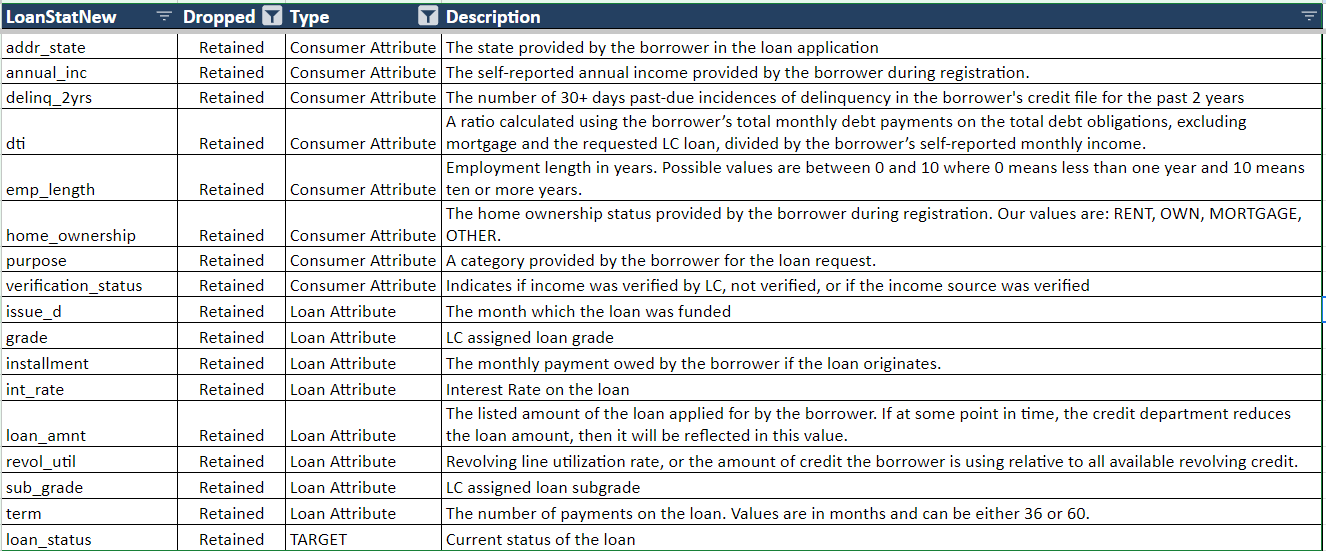

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                38577 non-null  object 
 11  emp_length               38577 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status      38

## Check again for missing values

In [220]:
nullColReport(df)

Total number of columns:  45
Number of columns with null values:  2
Percentage of columns with null values: 4.44%
last_pymnt_d          0.184047
last_credit_pull_d    0.005184
dtype: float64


There are no missing values

## Cleaning Columns and correcting data types

In [221]:
# Remove '%' from 'revol_util' and convert to numeric
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

## Deriving new Variables

An importatnt parameter taken into consideration when evaluating repayment capacity of loan applicants is the ratio of installments to be paid to the monthly income of the applicant.
The larger the installment amount compared to monthly income the higher is the possibility of default due to possible future cash flow issues.

In [222]:
df['installment_to_monthly_income_ratio'] = (df['installment'] / (df['annual_inc'] / 12)) * 100


Derive issue month and year

In [223]:
df['issue_month'] = pd.to_datetime(df['issue_d'], format='%b-%y').dt.month
df['issue_year'] = pd.to_datetime(df['issue_d'], format='%b-%y').dt.year


## Identify columns with high number of outliers

In [224]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  # Calculate the IQR
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count outliers
  num_outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])

  # Print the results
  print(f"Column: {col}")
  print(f"Number of outliers: {num_outliers}")
  print("-" * 20)



Column: id
Number of outliers: 0
--------------------
Column: member_id
Number of outliers: 27
--------------------
Column: loan_amnt
Number of outliers: 1088
--------------------
Column: funded_amnt
Number of outliers: 920
--------------------
Column: funded_amnt_inv
Number of outliers: 1034
--------------------
Column: int_rate
Number of outliers: 65
--------------------
Column: installment
Number of outliers: 1373
--------------------
Column: annual_inc
Number of outliers: 1762
--------------------
Column: dti
Number of outliers: 0
--------------------
Column: delinq_2yrs
Number of outliers: 4191
--------------------
Column: inq_last_6mths
Number of outliers: 3554
--------------------
Column: open_acc
Number of outliers: 495
--------------------
Column: pub_rec
Number of outliers: 2070
--------------------
Column: revol_bal
Number of outliers: 2423
--------------------
Column: revol_util
Number of outliers: 0
--------------------
Column: total_acc
Number of outliers: 513
-----------

In the dataset, all outliers come from discrete numeric variables, except for the annual_inc column, which represents annual income.

**The annual_inc column contains significant outliers due to a few high-value loans being issued. We will now remove these outliers.**

In [225]:
# Calculate the IQR for annual_inc
Q1_annual_inc = df['annual_inc'].quantile(0.25)
Q3_annual_inc = df['annual_inc'].quantile(0.75)
IQR_annual_inc = Q3_annual_inc - Q1_annual_inc

# Define outlier boundaries for annual_inc
lower_bound_annual_inc = Q1_annual_inc - 1.5 * IQR_annual_inc
upper_bound_annual_inc = Q3_annual_inc + 1.5 * IQR_annual_inc

print('rows in data:', len(df))
print('Outliers to be removed from annual_inc')
print('Lower to be removed:', len(df[(df['annual_inc'] < lower_bound_annual_inc)]) )
print('Upper to be removed:', len(df[(df['annual_inc'] > upper_bound_annual_inc)]) )

# Remove outliers from annual_inc
df = df[(df['annual_inc'] >= lower_bound_annual_inc) & (df['annual_inc'] <= upper_bound_annual_inc)]

print('Rows in data after removal:', len(df))

rows in data: 38577
Outliers to be removed from annual_inc
Lower to be removed: 0
Upper to be removed: 1762
Rows in data after removal: 36815


## Save to loan_cleaned.csv

In [226]:
# Save to loan_cleaned.csv
df.to_csv('loan_cleaned.csv', index=False)

# Checkpoint 1 - Load Cleaned data from loan_cleaned.csv

This checkpoint is designed to streamline our analysis process. By running this step, you can load the cleaned data directly and proceed with further analysis without having to repeat the data wrangling steps.

In [227]:
# Load cleaned data from loan_cleaned.csv
df = pd.read_csv('loan_cleaned.csv')

# Univariate Analysis

## Variables for Univariate Analysis

In [228]:
# Sort and print column data types
info_df = pd.DataFrame(df.dtypes, columns=['dtype'])
info_df['column'] = info_df.index
info_df = info_df.sort_values(['dtype', 'column'], ascending=[False, True])
print(info_df)


                                       dtype                               column
addr_state                            object                           addr_state
desc                                  object                                 desc
earliest_cr_line                      object                     earliest_cr_line
emp_length                            object                           emp_length
emp_title                             object                            emp_title
grade                                 object                                grade
home_ownership                        object                       home_ownership
issue_d                               object                              issue_d
last_credit_pull_d                    object                   last_credit_pull_d
last_pymnt_d                          object                         last_pymnt_d
loan_status                           object                          loan_status
purpose         

## Define function for univariate analysis

Define function to perform Univariate analysis.

This function generates descriptive statistics for the specified column and visualizes the distribution of the data.

It handles both categorical and numerical columns by producing count plots for categorical variables and histograms & boxplots for numerical variables.

In [229]:
def uva(col, col_name, data, figsize=None):
  """
  Perform Univariate Analysis (UVA) on a given column in the dataset.

  This function generates descriptive statistics for the specified column and visualizes the distribution of the data.
  It handles both categorical and numerical columns by producing count plots for categorical variables and histograms & boxplots
  for numerical variables.

  Parameters:
  col (str): The column name from the dataframe to analyze.
  col_name (str): The label to display in the plots for the column.
  data (DataFrame): The pandas DataFrame containing the data.
  figsize (tuple, optional): The figure size for the plot. Defaults to None.

  Returns:
  None
  """
  # Print summary statistics of the column
  print(f'---- Describe column "{col}" ----')
  print(data[col].describe())
  print(f'\n')

  # Check if variable is categorical
  if data[col].dtype == 'object' or data[col].dtype == 'category':
    plt.figure(figsize=figsize)
    sns.countplot(x=col, data=data)
    plt.title(f'Count of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90) # Rotate x-axis labels
  else:
    # Create subplots for numerical variables: Histogram and Boxplot
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    # Create a histogram with kernel density estimate (KDE)
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col_name}')
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel('Frequency')
    # Create a boxplot
    sns.boxplot(data[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col_name}')
    axes[1].set_xlabel(col_name)

  plt.show()

## Define function for Segmentation

Define function for Segmentation. This function divides a numerical column into bins and assigns labels to each bin.
The result is a new binned column added to the DataFrame.

Note that the new binned column is added to the dataframe.

In [230]:
def segment_col(col, col_name, edges, data, include_lowest=True):
  """
  Segment a numerical column into discrete bins based on the specified edges.

  This function divides a numerical column into bins and assigns labels to each bin.
  The result is a new binned column added to the DataFrame.
  Note that the new binned column is added to the dataframe.

  Parameters:
  col (str): The column name from the dataframe to bin.
  col_name (str): The label to display in the plots for the column.
  edges (list): A list of bin edges for binning.
  data (DataFrame): The pandas DataFrame containing the data.
  include_lowest (bool, optional): Whether the first interval should include the lowest value. Defaults to True.

  Returns:
  None
  """
  # Print the name of column to be binned
  print(f'---- Binning "{col}" ----')
  bin_labels = [f'{edges[i]}-{edges[i+1]}' for i in range(len(edges) - 1)]
  binned_column = pd.cut(df[col], bins=edges, labels=bin_labels, include_lowest=include_lowest)

  # Print the labels created
  print(bin_labels)

  # Create new column name
  new_col = col + '_binned'

  # Saved binned data in a new column in dataframe
  data.loc[:, new_col] = binned_column

  print(f'Created new column binned column "{new_col}" in dataframe')

## Define function for Segmented Univariate Analysis

Define function for Segmented Univariate Analysis.

This function calls the existing `uva()` function to generate visualizations and
descriptive statistics for a column that has already been segmented (binned).

It assumes the column has been binned and the binned version of the column is
named by appending '_binned' to the original column name.

In [231]:
def uva_segmented(col, col_name, data, figsize=None):
  """
  Perform Univariate Analysis (UVA) on a segmented (binned) column.

  This function calls the existing `uva()` function to generate visualizations and
  descriptive statistics for a column that has already been segmented (binned).
  It assumes the column has been binned and the binned version of the column is
  named by appending '_binned' to the original column name.

  Parameters:
  col (str): The original column name (without the '_binned' suffix).
  col_name (str): The label to display in the plots for the column.
  data (DataFrame): The pandas DataFrame containing the data.
  figsize (tuple, optional): The figure size for the plot. Defaults to None.

  Returns:
  None
  """
  uva(col=col+'_binned', col_name=col_name, data=data, figsize=figsize)

## Categorical

#### Address State

---- Describe column "addr_state" ----
count     36815
unique       50
top          CA
freq       6589
Name: addr_state, dtype: object




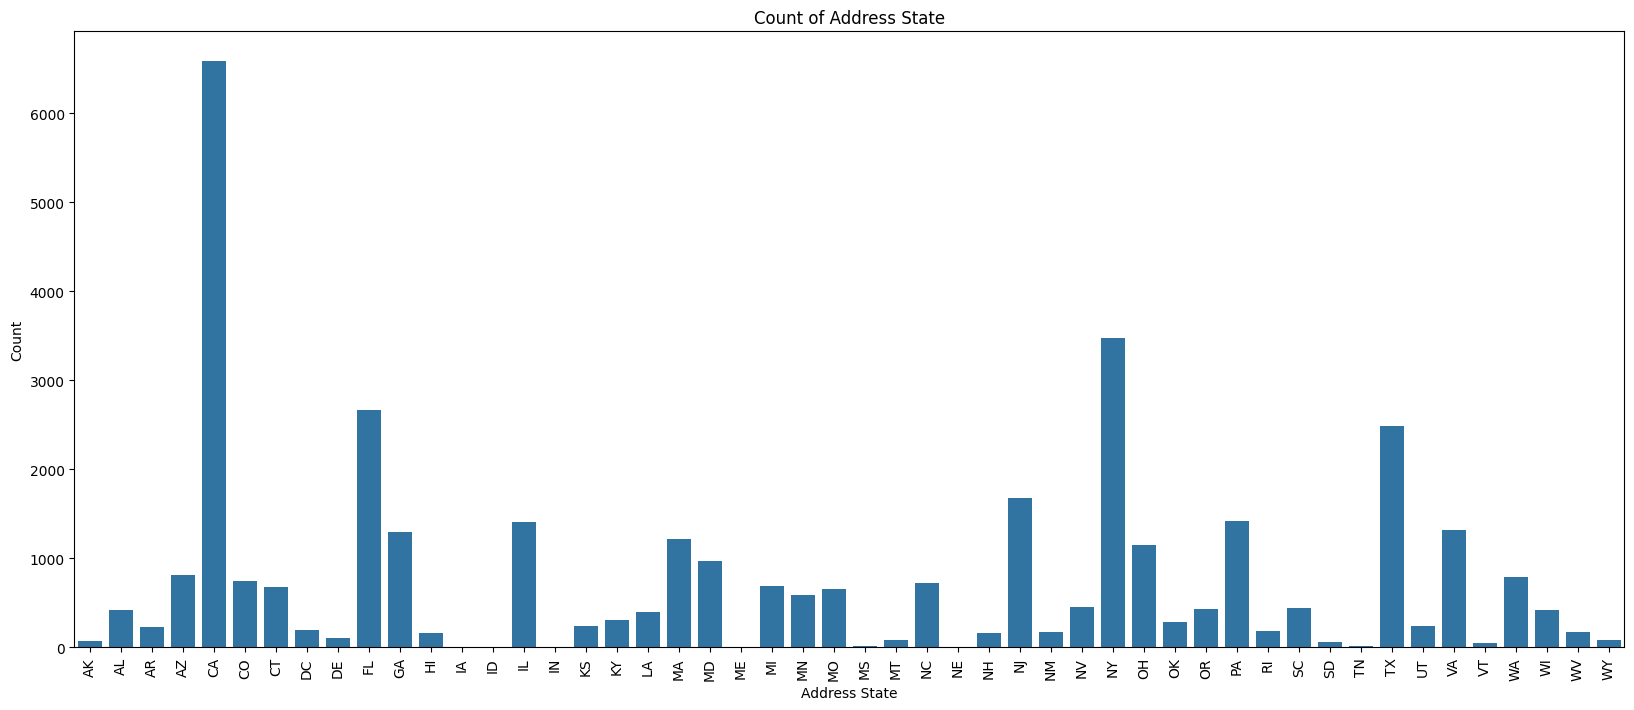

In [232]:
uva(col='addr_state', col_name='Address State', data=df.sort_values('addr_state'), figsize=(20,8))

**Analysis:**
* California (CA) has the highest number of loan applicants significantly outnumbering other states.
* Florida (FL) and New York (NY) follow
* States like Texas (TX), Georgia (GA), Illinois (IL), and North Carolina (NC) have a moderate number of applicants
* Several states, including South Dakota (SD), Montana (MT), and Vermont (VT), show very few loan applicants.
* West Virginia (WV), Colorado (CO), and Washington (WA) have a higher-than-average count, but still much lower than CA, FL, and NY.


**Inference:**
The distribution of loan applicants varies significantly by state, with California being a clear outlier in terms of the number of applicants. This could suggest regional factors or market conditions influencing the demand for loans in different states.

#### Home Ownership

---- Describe column "home_ownership" ----
count     36815
unique        5
top        RENT
freq      18063
Name: home_ownership, dtype: object




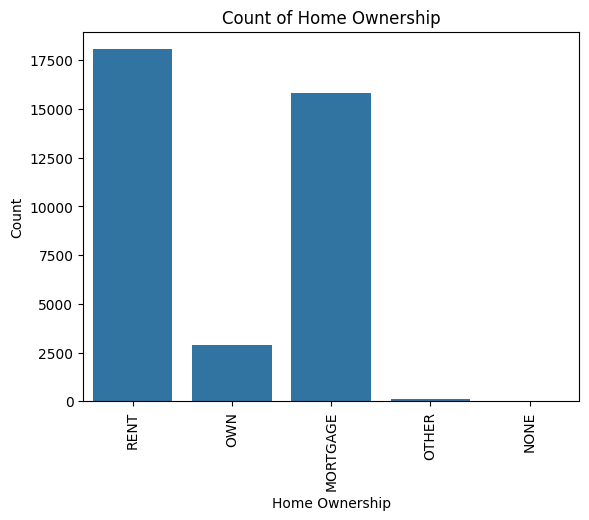

In [233]:
uva(col='home_ownership', col_name='Home Ownership', data=df, figsize=None)

**Analysis**
* The most common form of home ownership is Renting, followed by Mortgage.
* The categories "Own," "Other," and "None" have significantly lower counts compared to "Rent" and "Mortgage."
* The distribution is skewed towards "Rent" and "Mortgage"

**Inference**
Renting and owning a home with a mortgage are the primary housing ownership methords.


#### Purpose

---- Describe column "purpose" ----
count                  36815
unique                    14
top       debt_consolidation
freq                   17378
Name: purpose, dtype: object




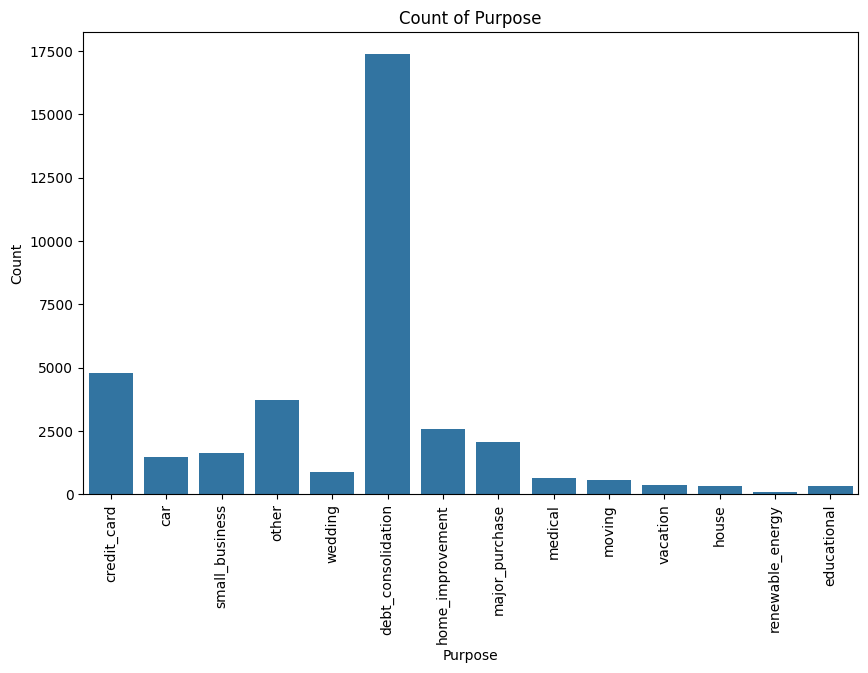

In [234]:
uva(col='purpose', col_name='Purpose', data=df, figsize=(10,6))

**Analysis**
* The most common loan purpose is Debt Consolidation, followed by Credit Card.
* Car, Small Business, and Wedding also have relatively high counts.
* The remaining categories, such as Other, Home Improvement, Major Purchase, Medical, Moving, Vacation, House, Renewable Energy, and Educational, have significantly lower counts.

**Inference**
* Large Number of  debt consolidation loans indicates that many individuals are struggling to manage their overall existing debt.
* Consumer Spending: The popularity of credit cards and car loans suggests that consumer spending is a significant driver of loan demand.
* While debt consolidation and consumer spending are dominant, there is also a demand for loans to cover specific needs such as home improvement, medical expenses, and education.

#### Verification Status

---- Describe column "verification_status" ----
count            36815
unique               3
top       Not Verified
freq             16320
Name: verification_status, dtype: object




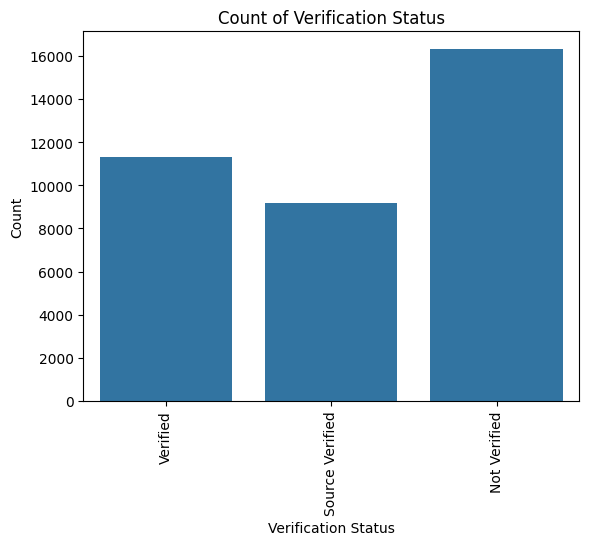

In [235]:
uva(col='verification_status', col_name='Verification Status', data=df, figsize=None)

**Analysis**
Majority of loans are not verified. While there are some loans that are verified or source verified, the "Not Verified" category dominates.

**Inference**
* The high prevalence of "Not Verified" might indicate that the verification process is not strictly enforced or that there are certain criteria that allow loans to be approved without verification.
* Lenders might have different risk assessment strategies that allow them to approve loans without verification, especially for borrowers with strong credit histories.

#### Grade

---- Describe column "grade" ----
count     36815
unique        7
top           B
freq      11152
Name: grade, dtype: object




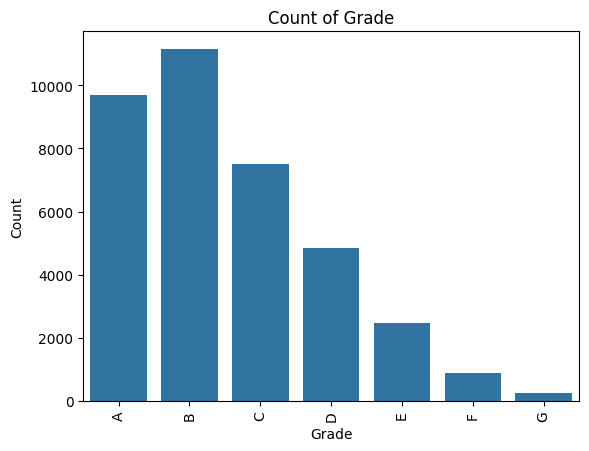

In [236]:
uva(col='grade', col_name='Grade', data=df.sort_values('grade'), figsize=None)

**Analysis:**
* Grade B has the highest count, with nearly 12,000 applicants, followed closely by Grade A, which has slightly more than 10,000 applicants.
* Grade C also has a substantial count, with around 8,000 applicants.
* Grades D and E show a gradual decline, with around 5,000 and 2,000 applicants, respectively.
* Grade F and Grade G have significantly fewer applicants, with Grade G having the lowest count, showing only a small fraction of applicants compared to the higher grades.

**Inference:**
Loan Grade and sub-grade are determined by the loan issuing organization, and preference to lend more to grades with lesser risk is clearly seen data and aligns with business goals as well.

#### Sub Grade

---- Describe column "sub_grade" ----
count     36815
unique       35
top          A4
freq       2759
Name: sub_grade, dtype: object




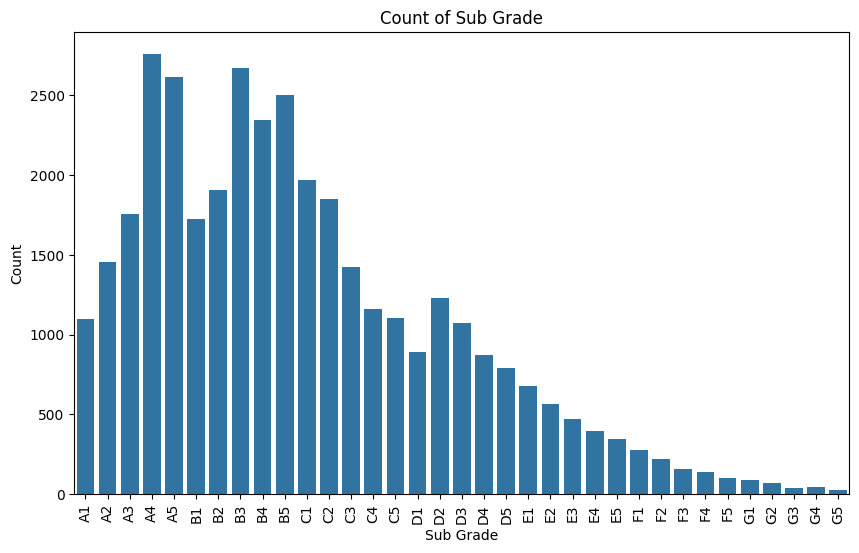

In [237]:
uva(col='sub_grade', col_name='Sub Grade', data=df.sort_values('sub_grade'), figsize=(10,6))

**Analysis**
* Sub Grade Distribution: The distribution of sub grades is skewed to the right, indicating that there are more loans in the lower sub grades (A1, A2, etc.) compared to the higher sub grades (F5, G1, etc.).
* Dominant Sub Grades: The sub grades A1, A2, A3, A4, A5, B1, B2, and B3 have the highest counts, suggesting that a majority of loans fall within these categories.

The analysis suggests that the majority of loans are issued to borrowers with relatively good credit ratings (A and B sub grades).

**Inference**
Loan Grade and sub-grade are determined by the loan issuing organization, and preference to lend more to grades with lesser risk is clearly seen data and aligns with business goals as well.

#### Employment Length

---- Describe column "emp_length" ----
count         36815
unique           12
top       10+ years
freq           7933
Name: emp_length, dtype: object




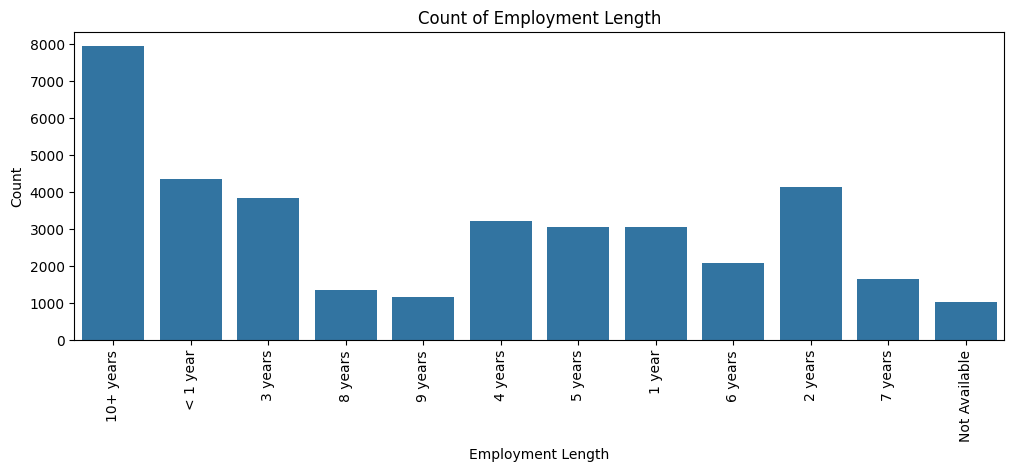

In [238]:
uva(col='emp_length', col_name='Employment Length', data=df, figsize=(12,4))

**Analysis:**
* 10+ years of employment shows the highest count, with over 8000 applicants, suggesting that many loan applicants have been employed for a long period.
* Applicants with employment of less than 1 year also have a significant representation, with around 5000 applicants.
* Other notable employment lengths include 3 years, 4 years, 5 years, and 2 years, each showing substantial counts in the range of 3000 to 4000 applicants.
* 6 years, 7 years, 8 years, and 9 years show relatively fewer applicants compared to other groups.
* A small number of records are marked as Not Available, indicating missing data in the employment length field.

**Inference:**
The majority of loan applicants either have substantial employment experience (10+ years) or are early in their employment (less than 1 year). This suggests a broad spectrum of applicants, from those well-established in their careers to those just starting.

### Term

---- Describe column "term" ----
count          36815
unique             2
top        36 months
freq           27837
Name: term, dtype: object




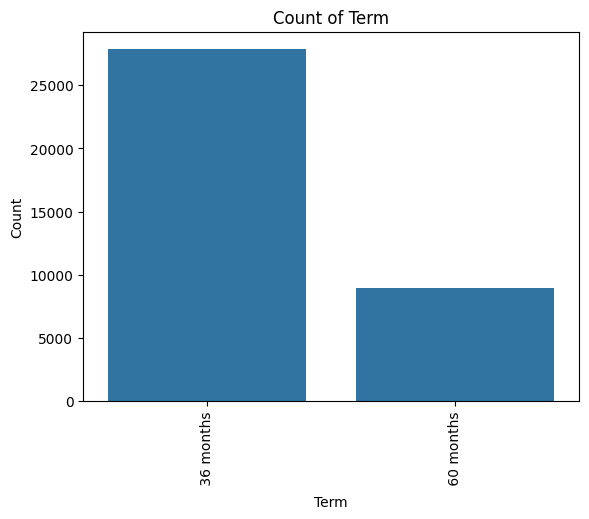

In [239]:
uva(col='term', col_name='Term', data=df, figsize=None)

**Analysis**
Majority of borrowers prefer shorter-term loans of 36 months.

**Inference**
* Borrowers might prefer shorter terms to reduce interest costs and minimize the overall debt burden.
* Lenders might offer shorter terms to borrowers with better credit scores, as they are considered less risky.
* Some borrowers might not be able to afford longer-term loans due to their financial situation.

## Numeric

### Annual Income

---- Describe column "annual_inc" ----
count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64




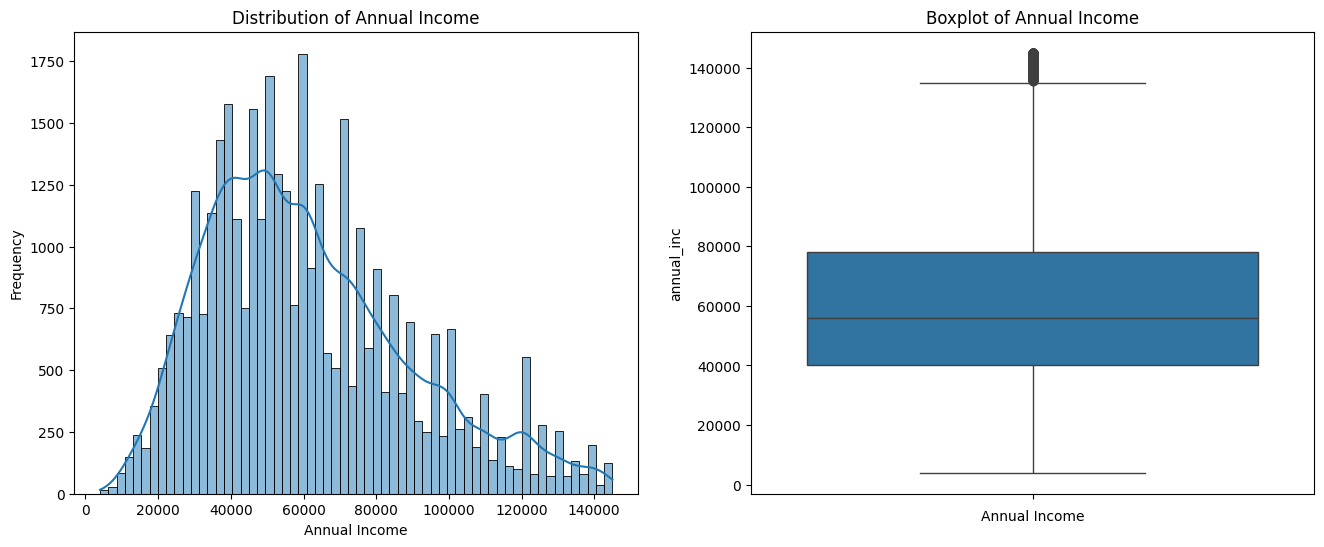

In [240]:
uva(col='annual_inc', col_name='Annual Income', data=df, figsize=(16,6))

**Histogram Analysis:**
* Distribution: The distribution is right-skewed, indicating that there are more individuals with lower incomes compared to higher incomes.
* Peak: The peak of the distribution is around $60,000, suggesting that this income level is the most common.
* Outliers: The right tail of the histogram extends to higher values, indicating the presence of outliers (high-income individuals).

**Boxplot Analysis:**
* Median: The median income is around $60,000, confirming the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of incomes are clustered around the median.
* Outliers: The boxplot shows few outliers. NOTE: outlier handling of this variable has already been performed.

**Inference:**

* The right-skewed distribution and the presence of outliers suggest a significant income inequality in the dataset. A small number of individuals earn significantly higher incomes than the majority.
* The majority of individuals have incomes clustered around $60,000, indicating a concentration of incomes at this level.

### Debt to Income Ratio

---- Describe column "dti" ----
count    36815.000000
mean        13.437614
std          6.660651
min          0.000000
25%          8.340000
50%         13.570000
75%         18.700000
max         29.990000
Name: dti, dtype: float64




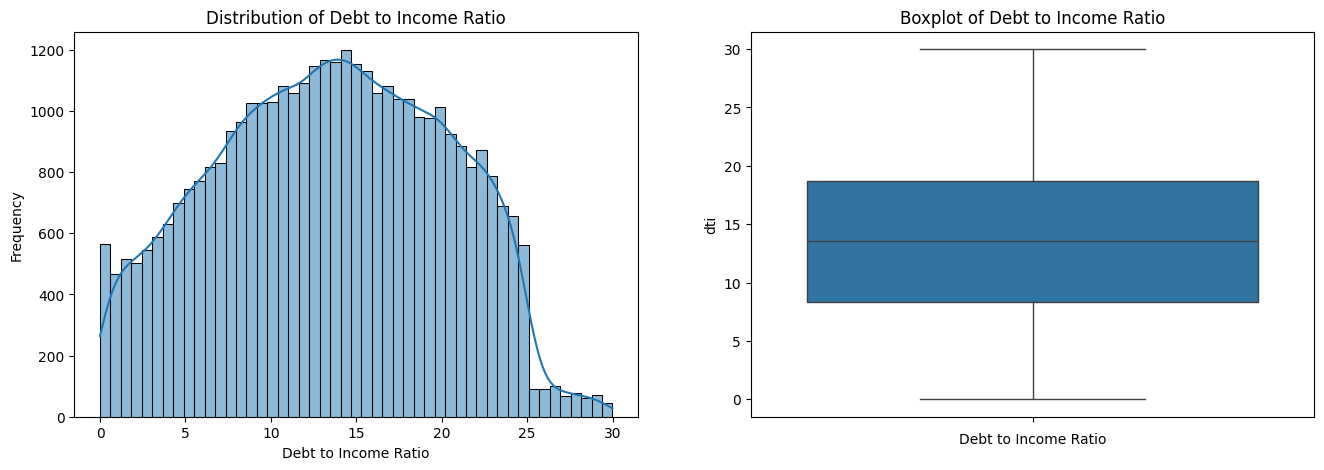

In [241]:
uva(col='dti', col_name='Debt to Income Ratio', data=df, figsize=(16,5))

**Histogram Analysis:**
* Distribution: The distribution is approximately normal, with a slight skew to the right. This indicates that the majority of individuals have debt-to-income ratios around the mean, with fewer individuals having significantly higher or lower ratios.
* Peak: The peak of the distribution is around 13-14, suggesting that this debt-to-income ratio is the most common.
* Outliers: While there are some outliers on the right side of the distribution (higher debt-to-income ratios), they are not as pronounced as in a highly skewed distribution.

**Boxplot Analysis:**
* Median: The median debt-to-income ratio is around 13.57, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of debt-to-income ratios are clustered around the median.

**Inference:**
* The majority of individuals have debt-to-income ratios around 13-14, suggesting that most people are able to manage their debt payments within a reasonable range.
* While there are some outliers with higher debt-to-income ratios, they are not as prevalent as in a highly skewed distribution. This indicates that most individuals are not facing extreme financial strain due to debt.

### Installment

---- Describe column "installment" ----
count    36815.000000
mean       312.593015
std        199.806808
min         15.690000
25%        163.305000
50%        271.140000
75%        409.700000
max       1305.190000
Name: installment, dtype: float64




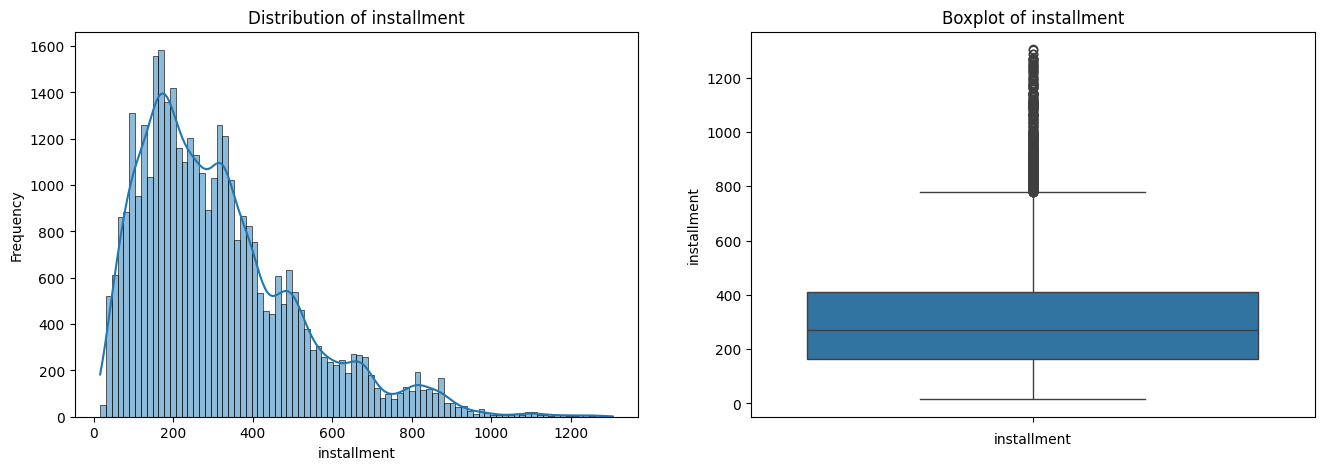

In [242]:
uva(col='installment', col_name='installment', data=df, figsize=(16,5))

**Histogram Analysis:**
* Distribution: The distribution is right-skewed, indicating that there are more loans with lower installment amounts compared to higher installment amounts.
* Peak: The peak of the distribution is around 200-300, suggesting that this installment range is the most common.
* Outliers: The right tail of the histogram extends to higher values, indicating the presence of outliers (loans with extremely high installment amounts).

**Boxplot Analysis:**
* Median: The median installment is around 277.86, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of installment amounts are clustered around the median.
* Outliers: The boxplot clearly shows a single outlier on the right side, representing an extremely high installment amount.

**Inference:**
* The majority of loans have installment amounts between 200 and 400, indicating that these are the most common repayment structures.
* The right-skewed distribution suggests that a smaller number of borrowers are taking on loans with significantly higher installment amounts, which might be related to higher incomes.

### Installment to Monthly Income Ratio

---- Describe column "installment_to_monthly_income_ratio" ----
count    36815.000000
mean         6.719414
std          4.012996
min          0.216686
25%          3.656515
50%          5.953680
75%          8.992807
max         32.026200
Name: installment_to_monthly_income_ratio, dtype: float64




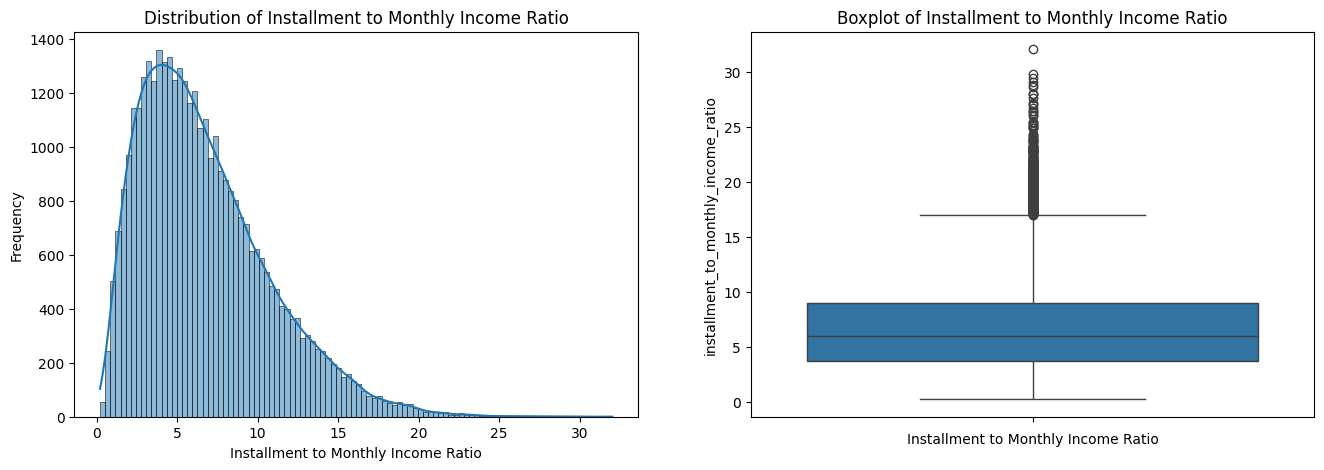

In [243]:
uva(col='installment_to_monthly_income_ratio', col_name='Installment to Monthly Income Ratio', data=df, figsize=(16,5))

***This is a derived variable***

**Histogram Analysis:**
* Distribution: The distribution is right-skewed, indicating that there are more individuals with lower installment-to-monthly income ratios compared to higher ratios.
* Peak: The peak of the distribution is around 6-7, suggesting that this ratio is the most common.
* Outliers: The right tail of the histogram extends to higher values, indicating the presence of outliers (individuals with extremely high installment-to-monthly income ratios).

**Boxplot Analysis:**
* Median: The median installment-to-monthly income ratio is around 6.12, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of ratios are clustered around the median.
* Outliers: The boxplot clearly shows multiple outliers on the right side, representing individuals with significantly higher installment-to-monthly income ratios.

**Inference:**
* The majority of individuals have installment-to-monthly income ratios between 3 and 9, suggesting that most people are able to manage their debt payments within a reasonable range.
* The right-skewed distribution and the presence of outliers indicate that a few (but not very small) number of individuals are facing financial strain due to high debt-to-income ratios.


### Interest Rate

---- Describe column "int_rate" ----
count    36815.000000
mean        11.889882
std          3.668709
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64




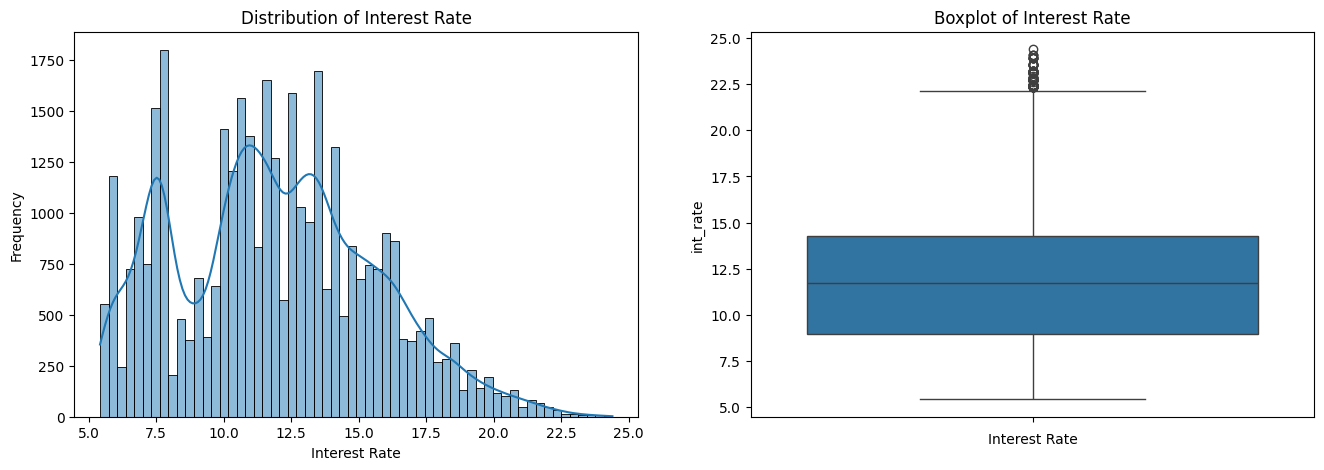

In [244]:
uva(col='int_rate', col_name='Interest Rate', data=df, figsize=(16,5))

**Histogram Analysis:**
* Distribution: The distribution is approximately normal, with a slight skew to the right. This indicates that the majority of loans have interest rates around the mean, with fewer loans having significantly higher or lower rates.
* Peak: The peak of the distribution is around 11-12, suggesting that this interest rate range is the most common.
* Outliers: While there are some outliers on the right side of the distribution (higher interest rates), they are not as pronounced as in a highly skewed distribution.

**Boxplot Analysis:**
* Median: The median interest rate is around 11.71, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of interest rates are clustered around the median.
* Outliers: The boxplot shows a few outliers on the right side, indicating loans with significantly higher interest rates.

**Inference:**
* The majority of loans have interest rates between 8.94% and 14.27%, suggesting that these are typical interest rate ranges for the given dataset.
* While the distribution is relatively normal, there is still some variation in interest rates, especially a dip in the graph from 7.5% to around 11%. Indicates a certain threshold for the interest rates offered, crossing which results in a sudden jump (not gradual increase) in the rates charged.
* The outliers on the right side highlight the potential for higher interest rates to be charged to certain borrowers, possibly due to risk factors or limited loan options.

### Revolving Utilization

---- Describe column "revol_util" ----
count    36815.000000
mean        48.667249
std         28.265705
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64




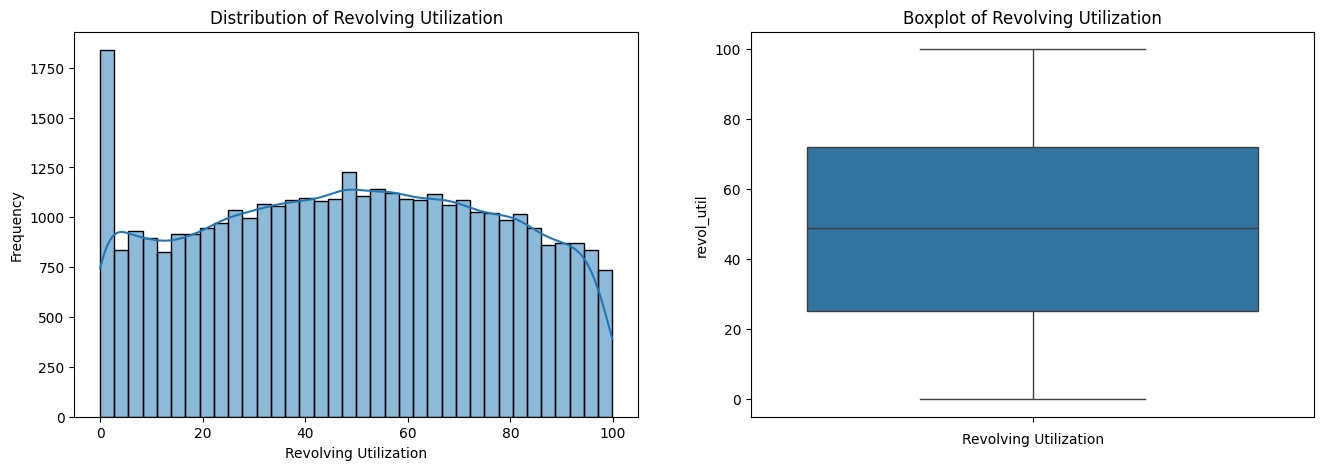

In [245]:
uva(col='revol_util', col_name='Revolving Utilization', data=df, figsize=(16,5))

**Histogram Analysis:**
* Distribution: The distribution is approximately normal, with a slight skew to the right. This indicates that the majority of individuals have revolving utilization rates around the mean, with fewer individuals having significantly higher or lower rates.
* Peak: The peak of the distribution is around 45-50, suggesting that this revolving utilization range is the most common.
* Outliers: While there are some outliers on the right side of the distribution (higher revolving utilization rates), they are not as pronounced as in a highly skewed distribution.

**Boxplot Analysis:**
* Median: The median revolving utilization is around 49, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of revolving utilization rates are clustered around the median.
* Outliers: The boxplot shows a few outliers on the right side, indicating individuals with significantly higher revolving utilization rates.

**Inference:**
* The majority of individuals have revolving utilization rates between 25 and 72, suggesting that most people are managing their credit card balances within a reasonable range.
* The distribution indicates that loan are issues equally among all the revolving credit utilization levels and this variable it probably not considered during loan evaluation.

### Loan Amount

---- Describe column "loan_amnt" ----
count    36815.000000
mean     10706.984925
std       7068.107909
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64




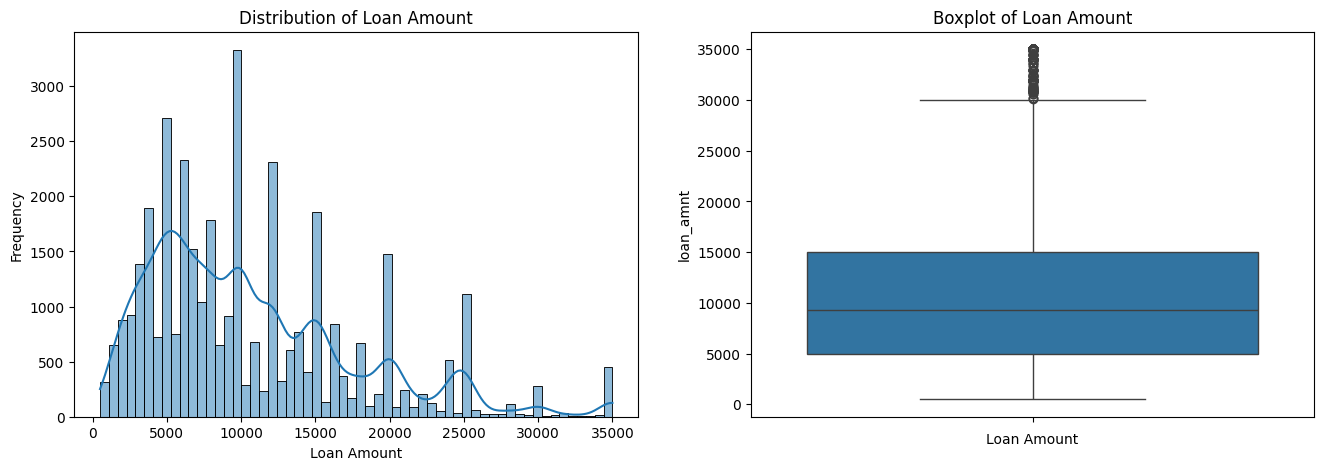

In [246]:
uva(col='loan_amnt', col_name='Loan Amount', data=df, figsize=(16,5))

**Histogram Analysis:**
* Distribution: The distribution is right-skewed, indicating that there are more loans with lower amounts compared to higher amounts.
* Peak: The peak of the distribution is around 5,000-10,000, suggesting that this loan amount range is the most common.
* Outliers: The right tail of the histogram extends to higher values, indicating the presence of outliers (loans with extremely high amounts).

**Boxplot Analysis:**
* Median: The median loan amount is around 9,250, which is consistent with the peak observed in the histogram.
* Interquartile Range (IQR): The IQR, represented by the box, is relatively narrow, suggesting that the majority of loan amounts are clustered around the median.
* Outliers: The boxplot clearly shows a single outlier on the right side, representing an extremely high loan amount.

**Inference:**
* The majority of loans are for amounts between 5,000 and 15,000, indicating that these are the most common loan sizes.
* The right-skewed distribution suggests that a smaller number of borrowers require larger loans.

### Issue Month

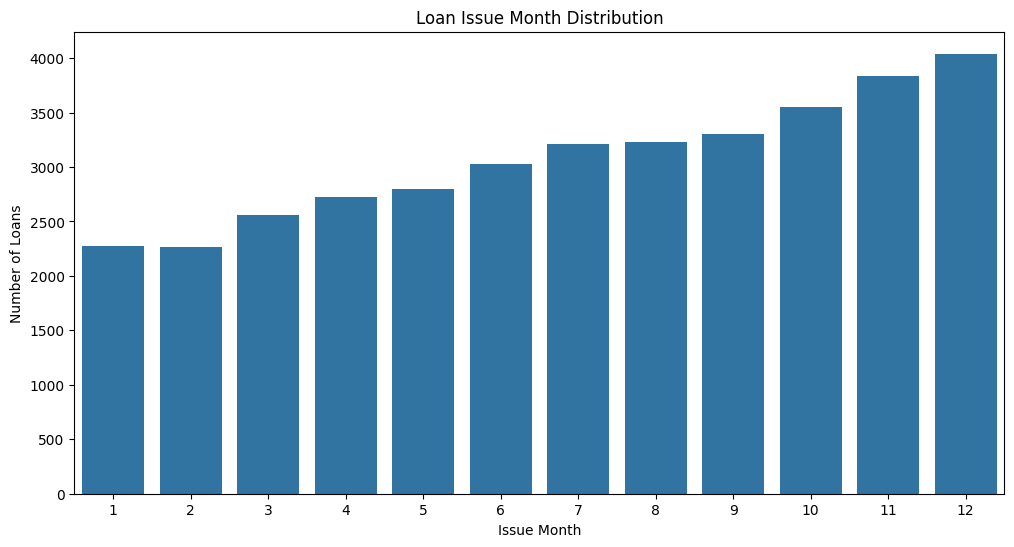

In [247]:
#uva(col='issue_month', col_name='Issue Month', data=df.sort_values('issue_month'), figsize=(16,4))

plt.figure(figsize=(12, 6))
sns.countplot(x='issue_month', data=df)
plt.title('Loan Issue Month Distribution')
plt.xlabel('Issue Month')
plt.ylabel('Number of Loans')
plt.show()


We can make the following observations:

**Monthly Trend:** There appears to be a general upward trend in the number of loans issued over the months.

**Peak in December:** The month of December has the highest number of loans issued

**Seasonal Patterns:** The data suggests that there might be seasonal patterns in loan issuance, with higher activity towards the end of the year, thanksgiving, Christmasm holiday spending, year-end bonuses, and tax refunds.

### Issue Year

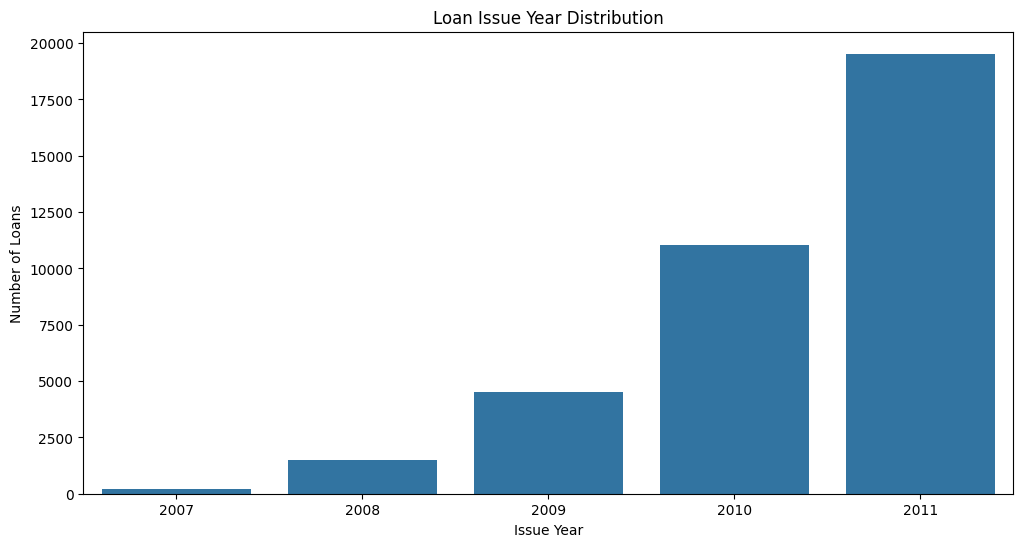

In [248]:
#uva(col='issue_year', col_name='Issue Year', data=df.sort_values('issue_year'), figsize=(16,6))

plt.figure(figsize=(12, 6))
sns.countplot(x='issue_year', data=df)
plt.title('Loan Issue Year Distribution')
plt.xlabel('Issue Year')
plt.ylabel('Number of Loans')
plt.show()

We can make the following observations:

**Year-Over-Year Trend:** There appears to be a general upward trend in the number of loans issued from 2007 to 2011.

**Significant Increase in 2011:** The year 2011 saw a significant increase in loan issuance compared to previous years.

##Segmented Univariate Analysis

### Annual Income

To perform a segmented univariate analysis, we can divide the data into subgroups based on other relevant variables and then analyze the distribution of annual_inc_binned within each subgroup. This will help us understand how annual income varies across different segments of the population.

---- Binning "annual_inc" ----
['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-100000', '100000-110000', '110000-120000', '120000-130000', '130000-140000', '140000-150000']
Created new column binned column "annual_inc_binned" in dataframe
---- Describe column "annual_inc_binned" ----
count           36815
unique             15
top       40000-50000
freq             5691
Name: annual_inc_binned, dtype: object




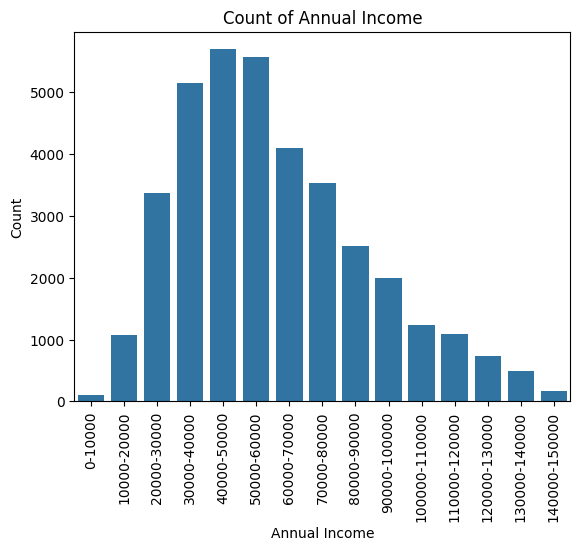

In [249]:
segment_col(col='annual_inc', col_name='Annual Income', data=df, edges=range(0,150001,10000))
uva_segmented(col='annual_inc', col_name='Annual Income', data=df)

A significant portion of the population has annual incomes in the lower to middle range.

There are fewer individuals with higher incomes, suggesting a concentration of wealth in the lower to middle-income brackets.

The overall income distribution is not evenly spread, with a clear bias towards lower incomes.

# Bivariate Analysis

count    36815.000000
mean         0.056689
std          0.240012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


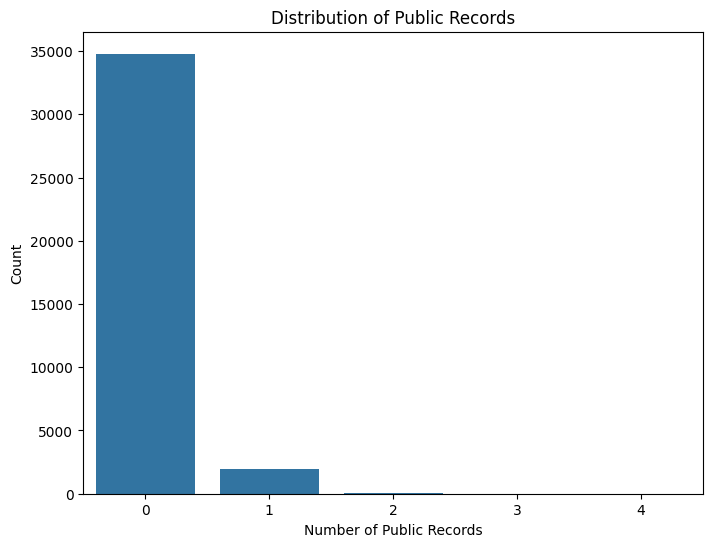

In [250]:
# Univariate analysis for pub_rec
print(df['pub_rec'].describe())
plt.figure(figsize=(8, 6))
sns.countplot(x='pub_rec', data=df)
plt.title('Distribution of Public Records')
plt.xlabel('Number of Public Records')
plt.ylabel('Count')
plt.show()


## Categorical

**We'll employ a combined percentage and count analysis for categorical bivariate analysis of loan status. This approach safeguards against potential biases arising from either a high volume of loans or a high default rate in any particular category. By considering both percentage and count data, we can draw more reliable conclusions and prevent inferences based on categories with low sample sizes or disproportionately high default rates.**

### Define Bivariate Categorial Variable Analysis Function

Define function to perform Bivariate Categorical Analysis.

  This function generates two side-by-side bar plots:
  1. A bar plot showing the percentage distribution of loan statuses for each category in the specified column.
  2. A stacked bar plot showing the count of loan statuses for each category.

In [251]:
def bva_catagorical(col, col_name, data, figsize=(12,4), ticks=False):
  """
  Perform Bivariate Analysis (BVA) for a categorical column against loan status.

  This function generates two side-by-side bar plots:
  1. A bar plot showing the percentage distribution of loan statuses for each category in the specified column.
  2. A stacked bar plot showing the count of loan statuses for each category.

  It uses `pivot_table` to compute the percentage of loan statuses and `groupby` to calculate counts. It also allows
  for optional tick labels on the first plot to display percentage values within the bars.

  Parameters:
  col (str): The name of the categorical column to analyze.
  col_name (str): The label to display in the plots for the column.
  data (DataFrame): The pandas DataFrame containing the data.
  figsize (tuple, optional): The figure size for the plot. Defaults to (12,4).
  ticks (bool, optional): Whether to display percentage values inside the bars of the first plot. Defaults to False.

  Returns:
  None
  """
  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=figsize)

  # Using groupby() and count()
  #grouped_data = data.groupby([col, 'loan_status'])['loan_status'].count().unstack().apply(lambda x: (x / x.sum()) * 100, axis=1)

  # Using groupby() and valuecount(normalize=True)
  #grouped_data = data.groupby(col)['loan_status'].value_counts(normalize=True).unstack() * 100

  # Create percentage distribution of Charged Off loans using pivot_table()
  grouped_data = data.pivot_table(index=col, columns='loan_status', values='loan_amnt', aggfunc='count', fill_value=0)
  grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
  grouped_data = grouped_data.drop('Fully Paid', axis=1)

  # Plot the percentage distribution of loan statuses
  grouped_data.plot(kind='bar', stacked=True, ax=axes[0], color=palette)
  axes[0].set_title(f'Percentage Loan Status by {col_name}')
  axes[0].set_xlabel(col_name)
  axes[0].set_ylabel('Percentage of Loan Status')
  axes[0].legend(bbox_to_anchor=(0.5, 1.3), loc='upper center')

  # Add percentage values inside the bars if ticks is True
  if ticks==True:
  # Add bar level amounts
    for i, v in enumerate(grouped_data.values):
        for j, c in enumerate(v):
            axes[0].text(i, c / 2 + sum(v[:j]), f'{c:.2f}%', color='black', ha='center')

  # Create count distribution of Fully paid and Charged Off loans groupby()
  grouped_data = data.groupby([col, 'loan_status'])['loan_status'].count().unstack()

  # Plot the count of loan statuses
  grouped_data.plot(kind='bar', stacked=True, ax=axes[1], color=palette)
  axes[1].set_title(f'Count of Loan Status by {col_name}')
  axes[1].set_xlabel(col_name)
  axes[1].set_ylabel('Count of Loan Status')
  axes[1].legend(bbox_to_anchor=(0.5, 1.3), loc='upper center')

  plt.show()

### Address State

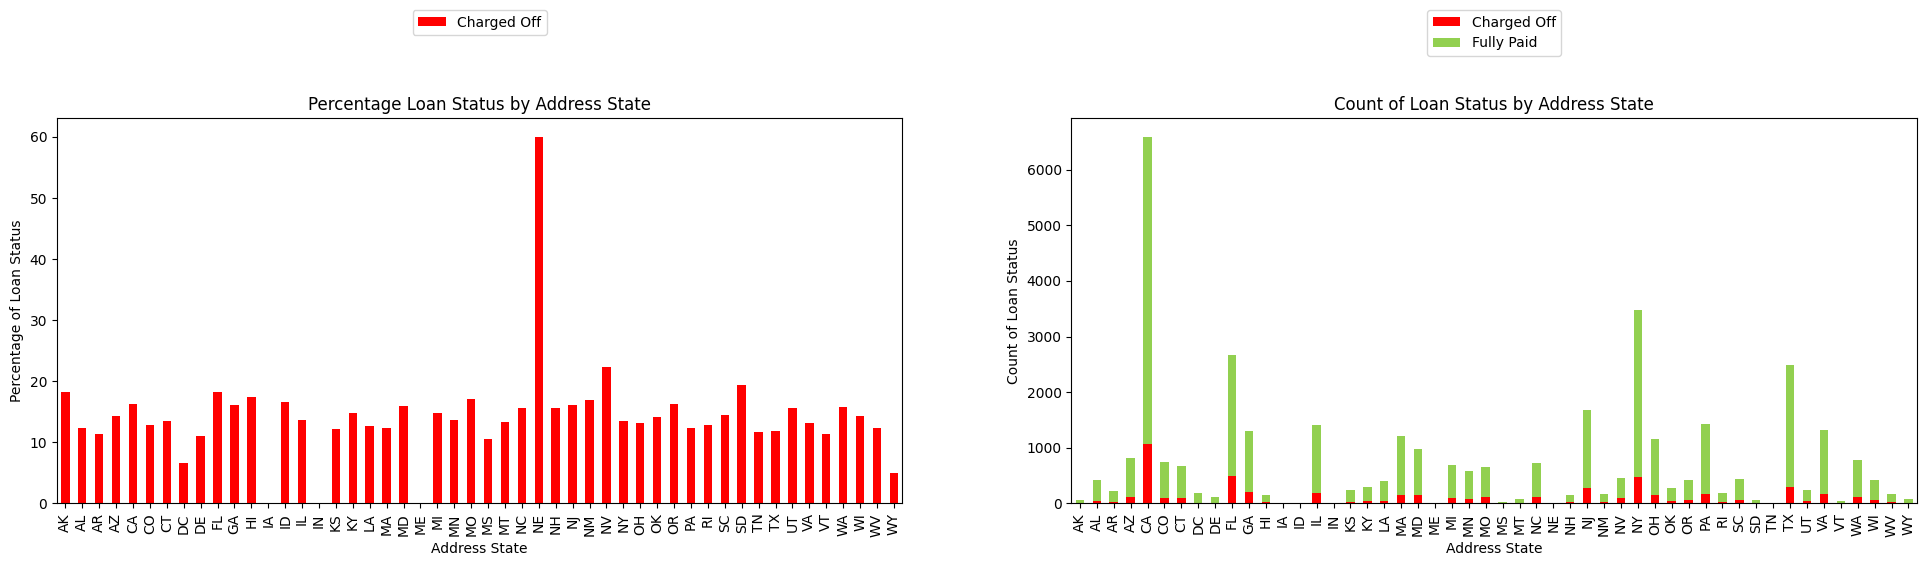

In [252]:
bva_catagorical(col='addr_state', col_name='Address State', figsize=(24, 5), data=df.sort_values('addr_state'))

**Analysis:**

* Note: Also refer to univariate analysis of Address State
* Among states with a substantial volume of loans (California, Florida, New York, New Jersey, Texas, Georgia, Illinois, and North Carolina), California, Florida, Georgia, North Carolina, and New Jersey exhibit default rates exceeding 15%.


**Inference:**

* States with a higher volume of loans tend to have default rates surpassing the overall average.
* In certain states with a significant number of loans, there appears to be a correlation between loan volume and default rates, suggesting potential issues with scaling lending operations.
* To mitigate risks in these states, it's recommended to implement stricter underwriting standards and consider charging higher interest rates.

### Employment Length

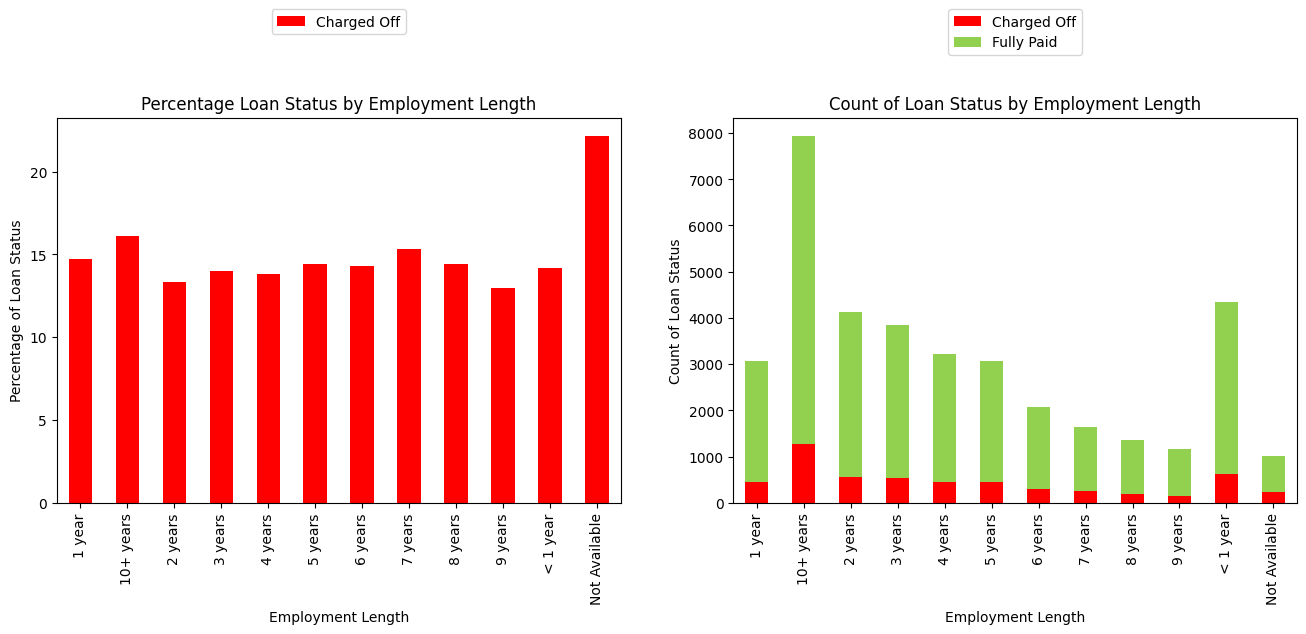

In [253]:
bva_catagorical(col='emp_length', col_name='Employment Length', figsize=(16, 5), data=df)

**Analysis:**

* Note: Also refer to univariate analysis of Employment Length
* After excluding loans with missing employment length data and considering the volume of loans issued for each employment category, we found that the highest number of defaults occurred among individuals with employment lengths of over 1 year, exactly 1 year, and over 10 years.
* While other employment categories also experienced defaults, the volume of loans in these categories was comparatively lower.


**Inference:**
* Individuals with both limited and extensive work experience appear to have a higher likelihood of loan defaults. This suggests that borrowers at both ends of the employment spectrum may face unique challenges that increase their risk of default.



### Grade

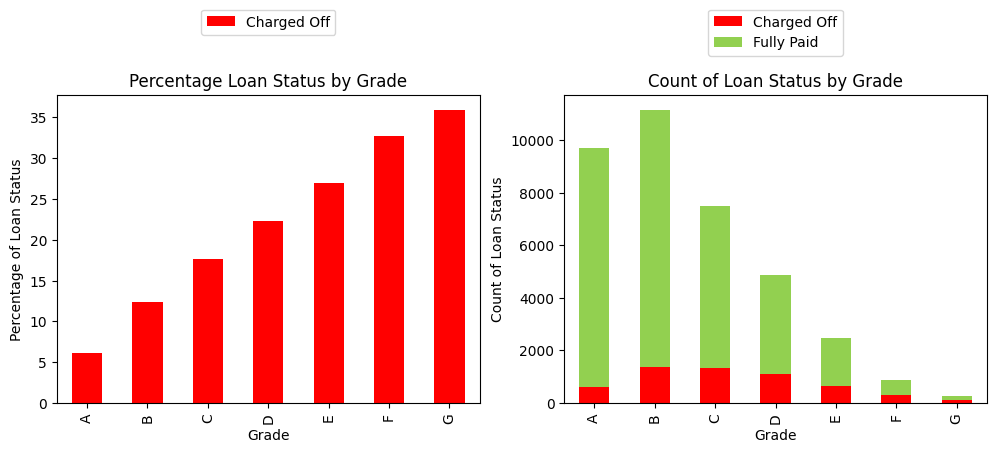

In [254]:
bva_catagorical(col='grade', col_name='Grade', data=df)

**Analysis:**

* There's a clear upward trend in default rates as we progress from Grade A to Grade G.
* This increase in default rates is linear
* While Grades F and G have fewer data points, the other grades have sufficient sample sizes.

**Inference:**

* **The loan grade is a strong driving factor of default probability.**
* The linear relationship between grade and default rate raises the possibility that the grade might have been assigned after the loan defaulted. However, for the purposes of this analysis, we're assuming that the grade was available at the time of loan evaluation. ***(Assumption)***

### Sub Grade

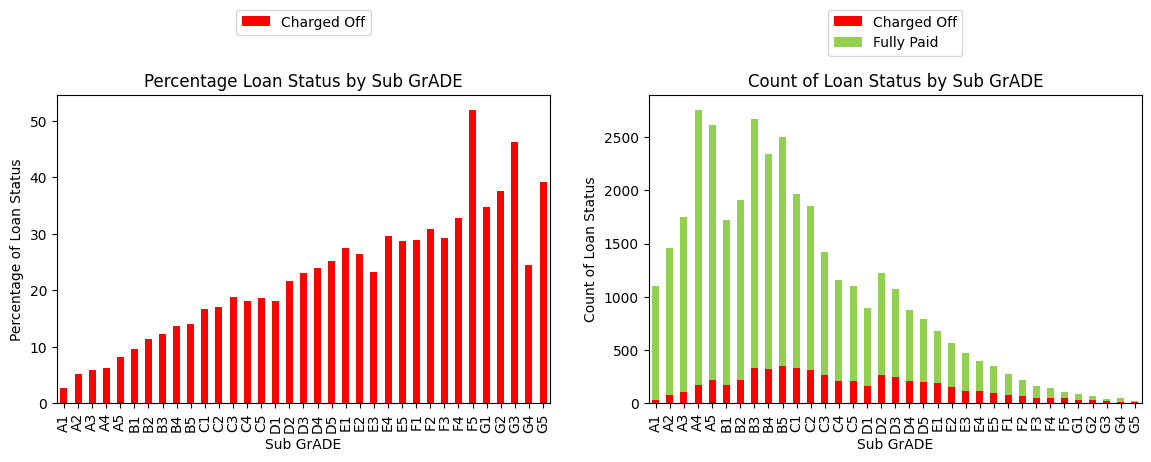

In [255]:
bva_catagorical(col='sub_grade', col_name='Sub GrADE', data=df.sort_values('sub_grade'), figsize=(14,4))

**Analysis:**

* There's a clear upward trend in default rates as we progress from Grade A to Grade G and within the grades from sub grade 1 to 5.
* This increase in default rates is roughly linear, with few exceptions around C3 to C4 and E2 to E3 and few spikes in F5a and G3
* While Grades F and G have fewer data points, the other grades have sufficient sample sizes.

**Inference:**

* **The loan sub grade is a strong driving factor of default probability.**
* The roughly linear relationship between sub grade and default rate raises the possibility that the grade might have been assigned after the loan defaulted. However, for the purposes of this analysis, we're assuming that the grade was available at the time of loan evaluation. ***(Assumption)***

### Home Ownership

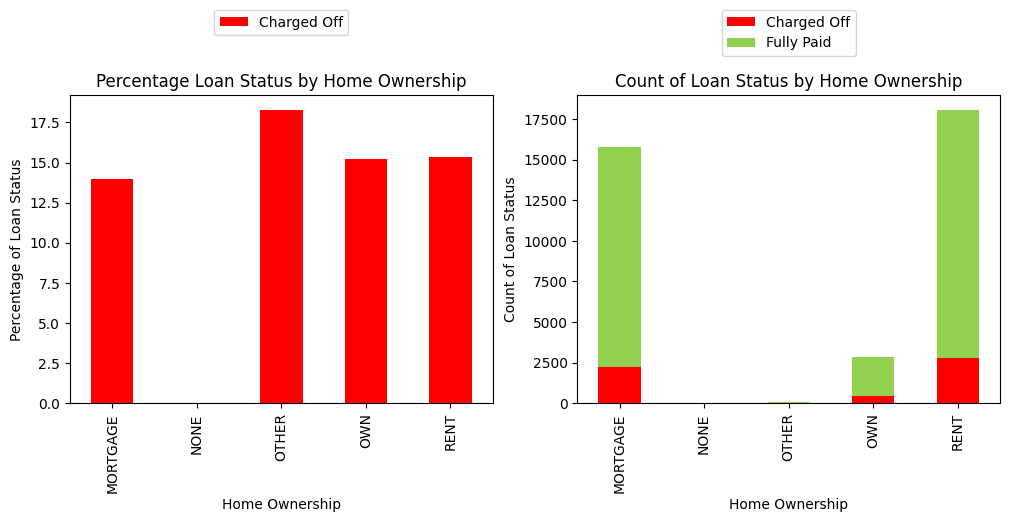

In [256]:
bva_catagorical(col='home_ownership', col_name='Home Ownership', data=df)

**Analysis:**

* Note: Also refer to univariate analysis of variable Home Ownership
* While the "Other" category has the highest default rate, it represents a relatively small number of loans.
* The categories "Mortgage," "Rent," and "Own" have a substantial volume of loans.
* The default rates for "Own" and "Rent" are comparable, while the default rate for "Mortgage" is lower.

**Inference:**

* Applicants with "Mortgage" as their home ownership status could be offered incentives or promotions, such as reduced interest rates, to encourage a higher volume of such loans. This could potentially improve the overall loan portfolio and reduce the risk of defaults.

### Purpose

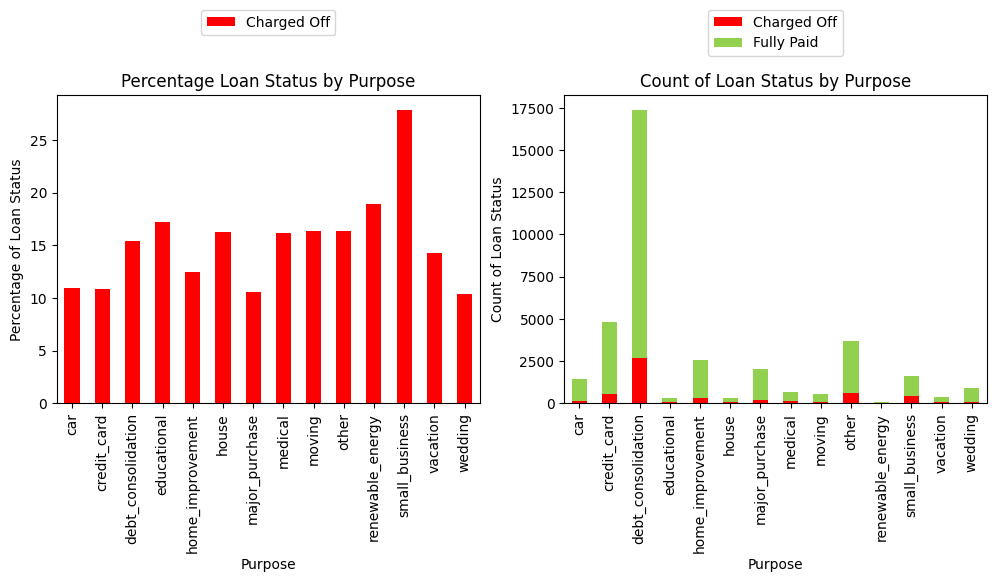

In [257]:
bva_catagorical(col='purpose', col_name='Purpose', data=df)

**Analysis:**
* Note: Also refer to univariate analysis of variable Home Ownership
* Debt consolidation is the most frequent reason for taking out loans.
* However, debt consolidation loans have a higher-than-average default rate.

**Inference:**
* Debt consolidation loans are disproportionately contributing to defaults.
* It's advisable to implement strategies to diversify the reasons for which loans are taken, thereby reducing the concentration of risk associated with debt consolidation.

### Term

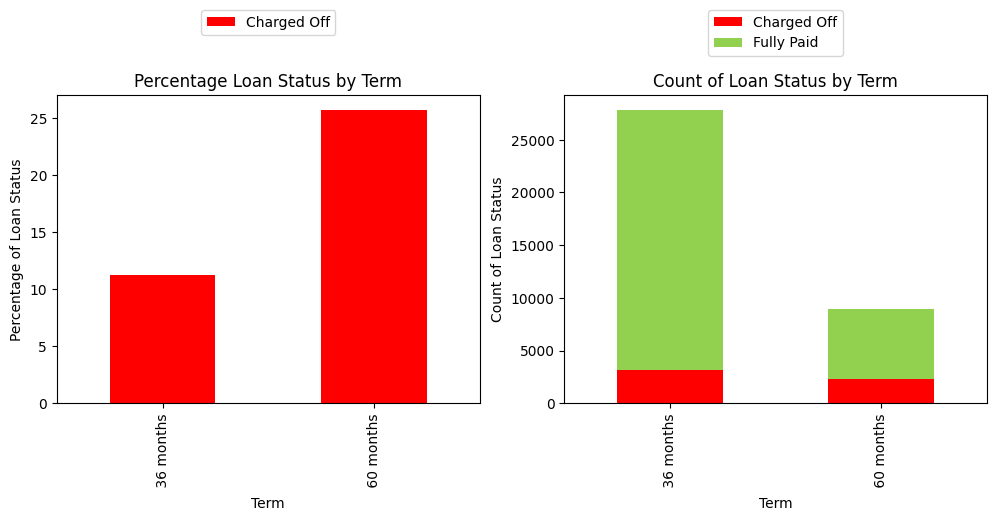

In [258]:
bva_catagorical(col='term', col_name='Term', data=df, figsize=(12,4))

**Analysis:**
* Note: Also refer to univariate analysis of variable Term
* Both 36-month and 60-month loan terms have a substantial number of loans.
* However, the default rate for 60-month loans is twice that of 36-month loans.

**Inference:**
* **Loan Term is a strong driving factor of defaut probability.**
* Add additional cehcks and scrutiny when long term loans are issued to mitigate risk of default.

### Verification Status

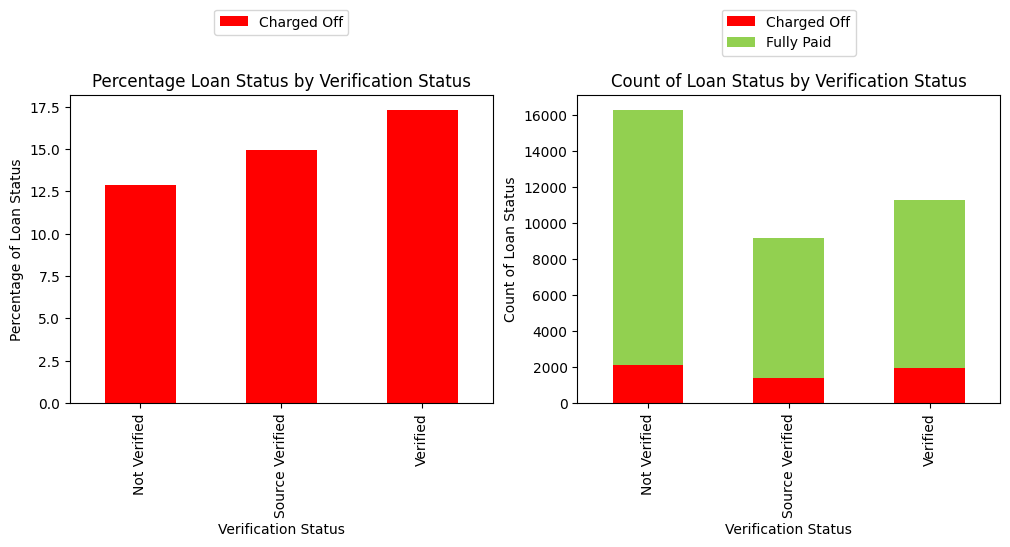

In [259]:
bva_catagorical(col='verification_status', col_name='Verification Status', data=df, figsize=(12,4))

**Analysis:**
* There is a significant volume of data across all verification categories.
* The "Verified" category has the highest number of defaults, followed by "Source Verified," while the "Not Verified" category has the lowest number of defaults.
* There is a linear increase in default rates from "Not Verified" to "Verified."

**Inference:**
* Based on the assumption that verification is conducted only for riskier loan applications, it appears that loans are more likely to default when verification is performed.
    **(Assumption)**
*  Even when source verification or full verification is conducted, default rates are not reduced to the same level as for customers who do not require verification.
* It would be beneficial to review the verification process and enhance its accuracy by incorporating additional verification attributes.

### Delinq Last two years

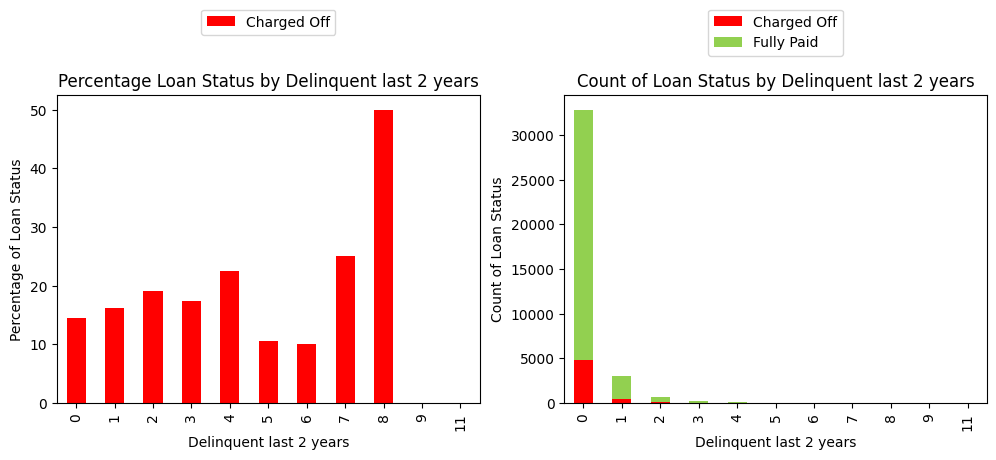

In [260]:
bva_catagorical(col='delinq_2yrs', col_name='Delinquent last 2 years', data=df, figsize=(12,4))

**Analysis:**
* There is a limited amount of data available for higher delinquency counts, particularly beyond 2 delinquencies in the past two years.
* While the highest delinquency rate is observed for 8 delinquencies, the underlying sample size is too small to draw statistically significant conclusions.
* There is a sufficient volume of data for 0, 1, and 2 delinquencies, with a clear upward trend in default rates as the number of delinquencies increases.

**Inference:**
* **Delinquency counts for the previous two years is a weak driving factor for default probablity.**
* While delinquency counts in the past two years do show some correlation with default probability, the relationship is relatively weak, especially for higher delinquency counts.

### Issue Month

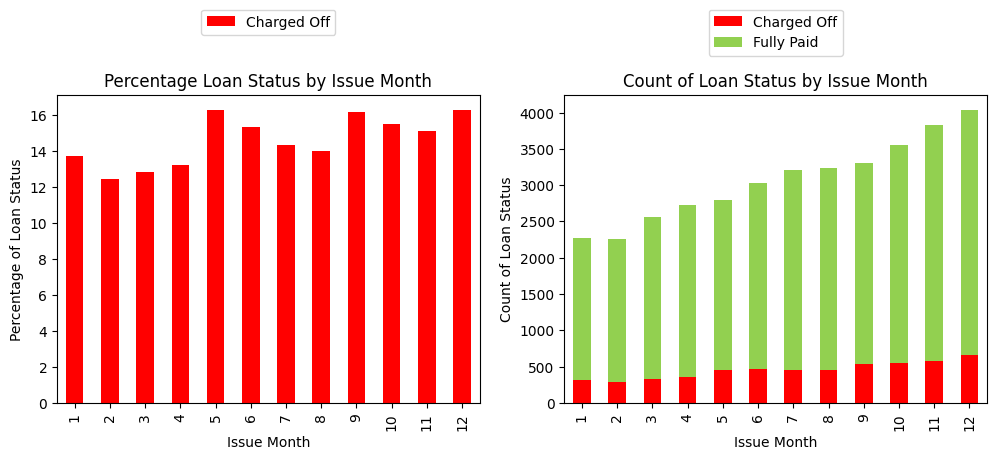

In [261]:
bva_catagorical(col='issue_month', col_name='Issue Month', data=df, figsize=(12,4))

**This is a derived variable**

**Analysis:**
* There is a clear upward trend in the number of loans issued from January to December.
* Default rates exhibit significant spikes in November-December, September, and May-June.

**Inference:**
* The volume of loans issued is directly correlated with general economic activity, which tends to be lower at the beginning of the year and gradually increases throughout the year, peaking in December due to year-end closures and holiday-related spending.
* The spikes in default rates coincide with major holidays in the United States: November-December (Halloween, Thanksgiving, and Christmas), September (Labor Day weekend), and May-June (Memorial Day weekend).
* Previous analysis of the "Purpose" variable revealed a high proportion of loans issued for Vacation, Home Improvement, and Weddings, which are often planned around holidays and long weekends.
* **Loans issued during the holiday season (November-December) and long weekends is a strong driving factor for defaults.**

### Issue Year

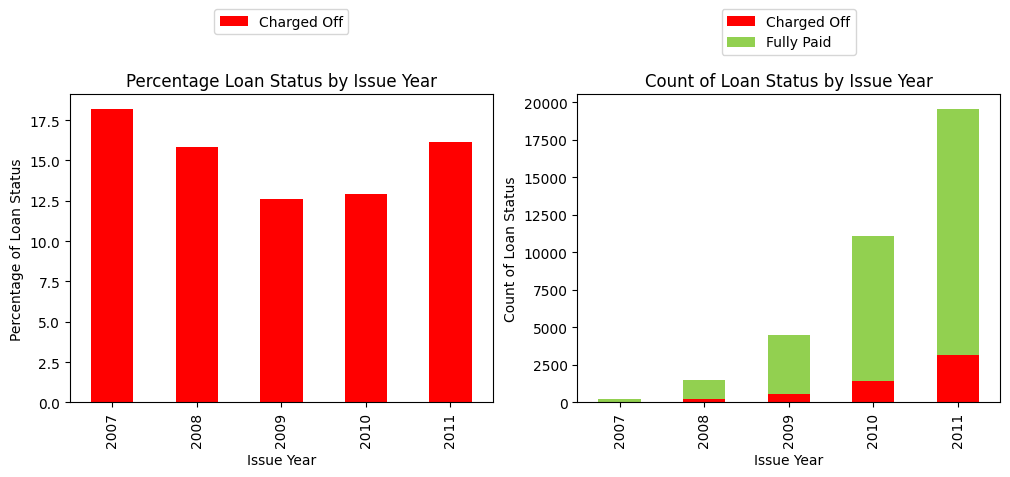

In [262]:
bva_catagorical(col='issue_year', col_name='Issue Year', data=df, figsize=(12,4))

**This is a derived variable**

**Analysis:**
* There was a significant exponential growth in the loan portfolio from 2007 to 2011.
* Default rates decreased from 2007 to 2009, remained stable from 2009 to 2010, and then increased in 2011.

**Inference:**
* The company's business expansion and scaling occurred primarily between 2007 and 2011.
* The internal processes and risk management practices were able to effectively manage the growth during the initial phase (2007-2009). However, the continued rapid expansion and scaling after this period led to a strain on the company's systems, processes and personnell, resulting in increased default rates.
* **The internal proceses within the company is not able to keep pace with the rapid expansion and scaling. Reivew, optimize and enhance loan risk assessment processes within the comapny to be in sync with the expansion and scaling goals**.

## Numeric

**We will conduct a distributional analysis of numeric variables to identify patterns in the distribution of different loan statuses.**

**We will attempt to determine if the distributions of numeric variables are separable. This separation could potentially be exploited to predict default probability.**

**The insights derived from this analysis will also inform the segmentation of numeric data. Subsequently, we will apply a similar approach to categorical bivariate analysis (details below).**

We'll employ a combined percentage and count analysis for numeric segmented bivariate analysis of loan status. This approach safeguards against potential biases arising from either a high volume of loans or a high default rate in any particular category. By considering both percentage and count data, we can draw more reliable conclusions and prevent inferences based on categories with low sample sizes or disproportionately high default rates.

### Define Bivariate Numeric Variable Analysis Function

Define function generates a violin plot to visualize the distribution of a numeric column (e.g., loan amount) across different loan statuses. The violin plot shows both the distribution of the data and the density of each loan status group.

In [263]:
def bva_numeric(col, col_name, data, figsize=None, ticks=False):
  """
  Perform Bivariate Analysis (BVA) for a numeric column against loan status.

  This function generates a violin plot to visualize the distribution of a numeric column
  (e.g., loan amount) across different loan statuses. The violin plot shows both the
  distribution of the data and the density of each loan status group.

  Parameters:
  col (str): The name of the numeric column to analyze.
  col_name (str): The label to display in the plots for the column.
  data (DataFrame): The pandas DataFrame containing the data.
  figsize (tuple, optional): The figure size for the plot. Defaults to None.
  ticks (bool, optional): Not used in this function. Placeholder for potential future usage. Defaults to False.

  Returns:
  None
  """
  #print(f'---- Describe Numeric column "{col}" ----')
  #print(data[col].describe())
  #print(f'\n')

  sns.violinplot(hue='loan_status', y=col, data=data, palette=palette)
  plt.title(f'Loan Amount Distribution by {col_name}')
  plt.xlabel('Loan Status')
  plt.ylabel(col_name)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()

### Define Segmentation(Binning) function for Numeric Variables to enable Segmented Bivariate Analysis on them

  Create function to segments (bins) numeric column based on the provided edges, creating a categorical column. It then calls `bva_catagorical` to perform bivariate analysis on the newly created binned column, analyzing its relationship with loan status through visualizations.
  
  Note that the new binned column is added to the dataframe.

In [264]:
def bva_segmented(col, col_name, edges, data, figsize=(12,4), include_lowest=True):
  """
  Perform Bivariate Analysis (BVA) for a segmented (binned) numeric column against loan status.

  This function first segments (bins) a numeric column based on the provided edges, creating a categorical column.
  It then calls `bva_catagorical` to perform bivariate analysis on the newly created binned column, analyzing its relationship
  with loan status through visualizations.
  Note that the new binned column is added to the dataframe.

  Parameters:
  col (str): The name of the numeric column to bin and analyze.
  col_name (str): The label to display in the plots for the column.
  edges (list): A list of bin edges (must be in increasing order) that define the intervals for binning.
  data (DataFrame): The pandas DataFrame containing the data.
  figsize (tuple, optional): The figure size for the plot. Defaults to (12, 4).
  include_lowest (bool, optional): Whether the first bin interval should include the lowest value. Defaults to True.

  Returns:
  None
    """
  print(f'---- Binning and analysing Numeric column "{col}" ----')
  print(f'\n')
  bin_labels = [f'{edges[i]}-{edges[i+1]}' for i in range(len(edges) - 1)]
  binned_column = pd.cut(df[col], bins=edges, labels=bin_labels, include_lowest=include_lowest)

  new_col = col + '_binned'
  data.loc[:, new_col] = binned_column

  bva_catagorical(col=new_col, col_name=new_col, data=data, figsize=figsize)

### Annual Income

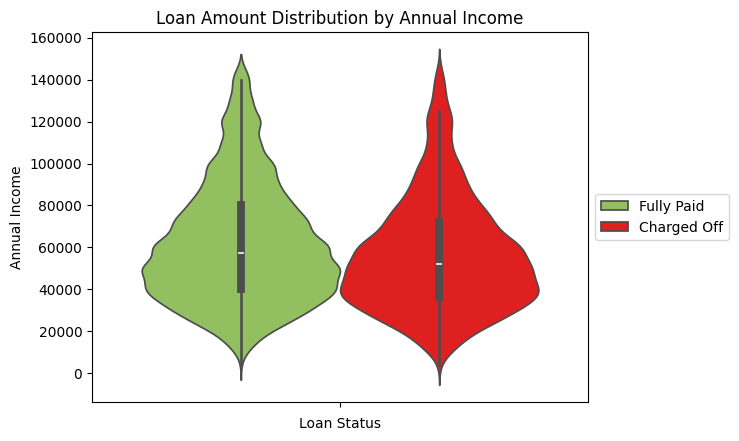

In [265]:
bva_numeric(col='annual_inc', col_name='Annual Income', data=df)

**Analysis:**
* Fully Paid: The distribution is generally skewed towards higher loan amounts, suggesting that borrowers with higher incomes tend to take on larger loans and are more likely to repay them in full.
* Charged Off: The distribution is more spread out, with a median loan amount that is lower than that of Fully Paid loans. This indicates that borrowers who default on their loans tend to have taken on smaller loans, on average.
* Overlap: There is some overlap between the distributions of loan amounts for Fully Paid and Charged Off loans, suggesting that loan amount alone is not a sufficient predictor of loan default.


* the violin plot suggests that there is a **moderate relationship** between loan amount and loan status. Borrowers who take on larger loans are more likely to repay them in full, while those who take on smaller loans are more likely to default.
* Segment Annual Income and perform further analysis

---- Binning and analysing Numeric column "annual_inc" ----




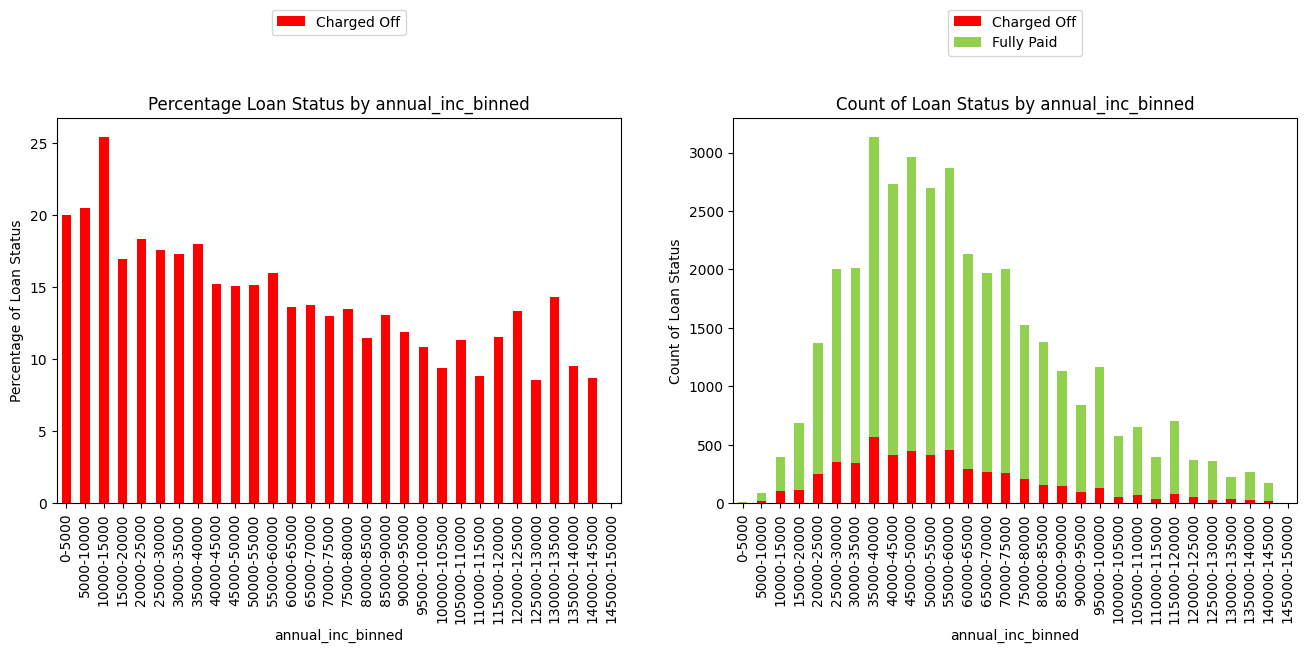

In [266]:
bva_segmented(col='annual_inc', col_name='Annual Income', edges=range(0,150001,5000), data=df, figsize=(16,5))

**Analysis:**
* The count of fully paid loans generally increases as the annual income binned increases. This is expected as borrowers with higher incomes are more likely to have the financial resources to repay their loans in full.
* The count of charged-off loans is relatively low across all income bins, indicating that most borrowers, regardless of income level, are able to repay their loans.
* The percentage of charged-off loans generally decreases as the annual income binned increases. This suggests that borrowers with higher annual incomes are less likely to default on their loans.
There are a few exceptions to this trend, where the percentage of charged-off loans increases slightly in certain income bins. This could be due to other factors influencing loan default.

**Inference:**
* There is a relationship between annual income and loan status. Borrowers with higher annual incomes are more likely to repay their loans in full, while those with lower incomes are more likely to default.
* **Annual income is a moderate driving factor for loan default**

### Debt to Income Ratio

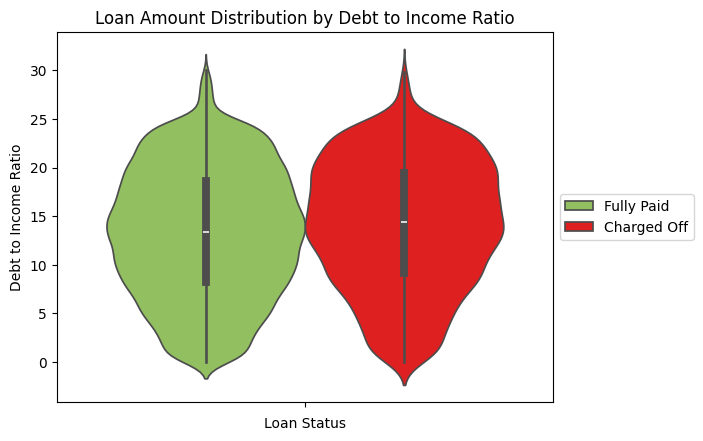

In [267]:
bva_numeric(col='dti', col_name='Debt to Income Ratio', data=df)

**Analysis:**
* Fully Paid: The violin plot is narrower and taller, with a more concentrated distribution of DTIs. This suggests that borrowers who repay their loans in full tend to have lower DTIs, indicating a stronger financial position.
* Charged Off: The violin plot is wider and shorter, with a more spread out distribution of DTIs. This indicates that borrowers who default on their loans have a wider range of DTIs, suggesting that their financial situations are more varied and potentially less stable.
* Median DTI: The median DTI for Fully Paid loans is lower than that for Charged Off loans, further reinforcing the observation that borrowers with lower DTIs are more likely to repay their loans in full.
* Overlap: There is some overlap between the distributions of DTIs for Fully Paid and Charged Off loans, suggesting that DTI alone is not a sufficient predictor of loan default.

**Inference:**
* The violin plot suggests that there is a **moderate relationship** between debt-to-income ratio and loan status. Borrowers with lower DTIs are more likely to repay their loans in full, while those with higher DTIs are more likely to default.
* Segment Debt to income ratio and perform further analysis

---- Binning and analysing Numeric column "dti" ----




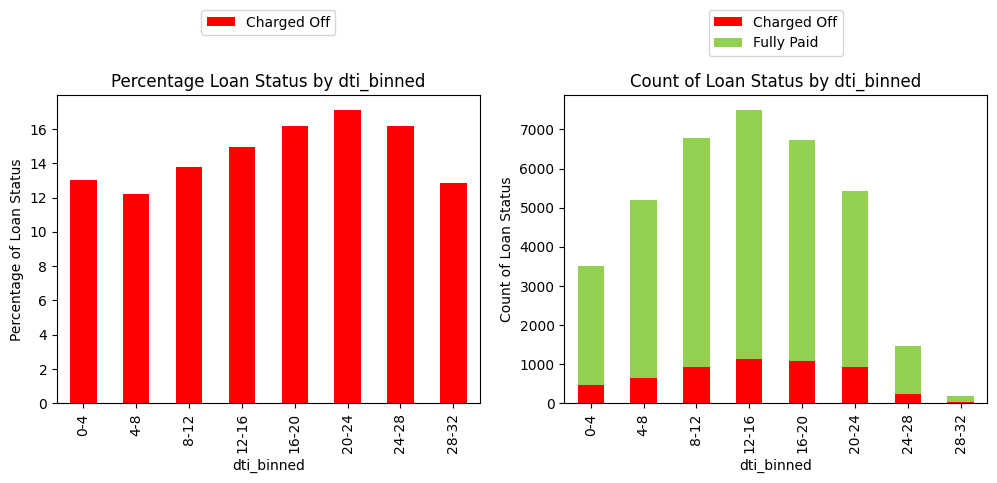

In [268]:
bva_segmented(col='dti', col_name='Debt to Incode Ratio', edges=range(0,36,4), data=df)

**Analysis:**
* The count of fully paid loans generally decreases as the debt-to-income ratio binned increases. This is expected as borrowers with higher DTIs have a higher proportion of their income committed to debt payments, which can make it more difficult to repay their loans in full.
* The count of charged-off loans is relatively high across all DTI bins, indicating that a significant number of borrowers, regardless of DTI level, are at risk of defaulting on their loans.
* The percentage of charged-off loans generally increases as the debt-to-income ratio binned increases. This suggests that borrowers with higher DTIs are more likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans decreases slightly in certain DTI bins. This could be due to other factors influencing loan default, such as annual income or credit history.


**Inference:**
* Borrowers with higher DTIs are more likely to default on their loans, while those with lower DTIs are more likely to repay their loans in full.
* Borrowers with high DTI have higher loan servicing burdena and can find it harder to absord unplanned finantial expences and these can result in loan defaults.
* **Debt to Income Ratio is a moderate driving factor for loan default**

### Installment

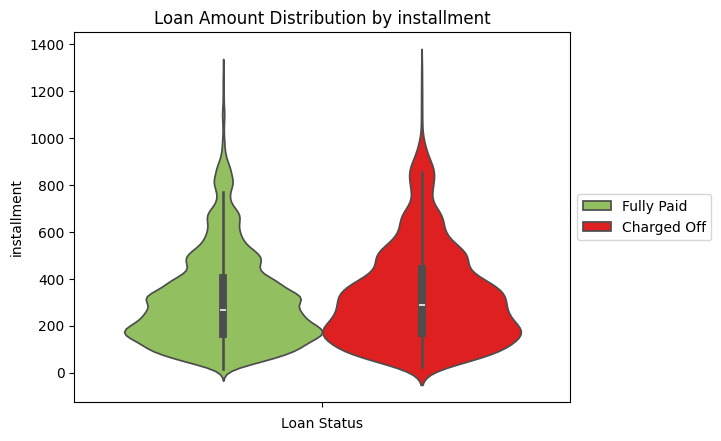

In [269]:
bva_numeric(col='installment', col_name='installment', data=df)

**Analysis:**
* Fully Paid: The violin plot is narrower and taller, with a more concentrated distribution of installments. This suggests that borrowers who repay their loans in full tend to have lower installments, indicating a more manageable debt burden.
* Charged Off: The violin plot is wider and shorter, with a more spread out distribution of installments. This indicates that borrowers who default on their loans have a wider range of installments, suggesting that their debt burdens vary more significantly.
* Median Installment: The median installment for Fully Paid loans is lower than that for Charged Off loans, further reinforcing the observation that borrowers with lower installments are more likely to repay their loans in full.
* Overlap: There is some overlap between the distributions of installments for Fully Paid and Charged Off loans, suggesting that installment amount alone is not a sufficient predictor of loan default. Other factors, such as credit score, loan amount, or income level, may also play a role.

**Inference:**
* The violin plot suggests that there is a **week relationship** between installment amount and loan status.
* Segment Installment variable and perform further analysis



---- Binning and analysing Numeric column "installment" ----




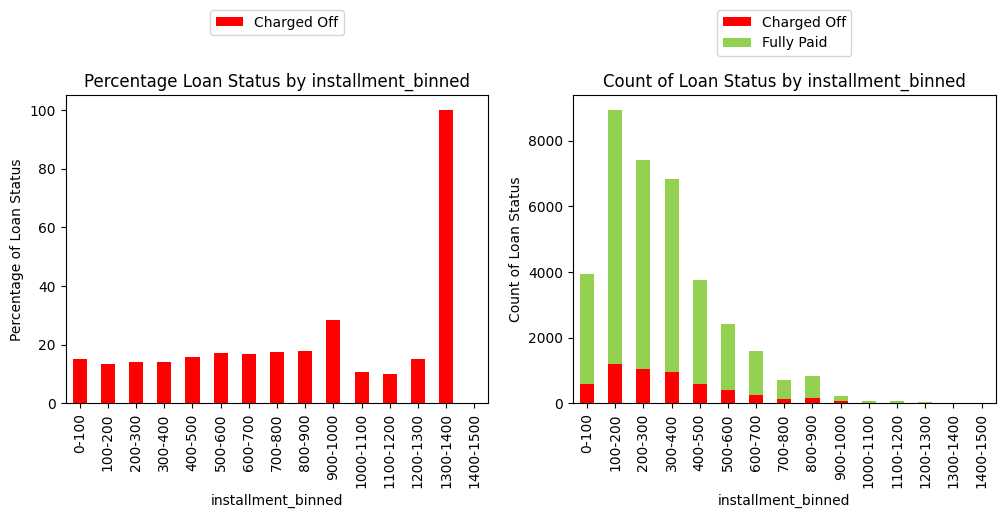

In [270]:
bva_segmented(col='installment', col_name='Installment', edges=range(0,1501,100), data=df)

**Analysis:**
* The count of fully paid loans generally increases as the installment binned increases. This is expected as borrowers with higher installments are more likely to have the financial resources to repay their loans in full.
* The count of charged-off loans is relatively low across all installment bins, indicating that most borrowers, regardless of installment level, are able to repay their loans.
* The percentage of charged-off loans generally decreases as the installment binned increases. This suggests that borrowers with higher installments are less likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans increases slightly in certain installment bins. This could be due to other factors influencing loan default, such as annual income or debt-to-income ratio.


**Inference:**
* Analysis suggests that there is a relationship between installment amount and loan status. Borrowers with higher installments are more likely to repay their loans in full, while those with lower installments are more likely to default.
* **Debt to Installment is a moderate driving factor for loan default**


### Installment to Monthly Income Ratio

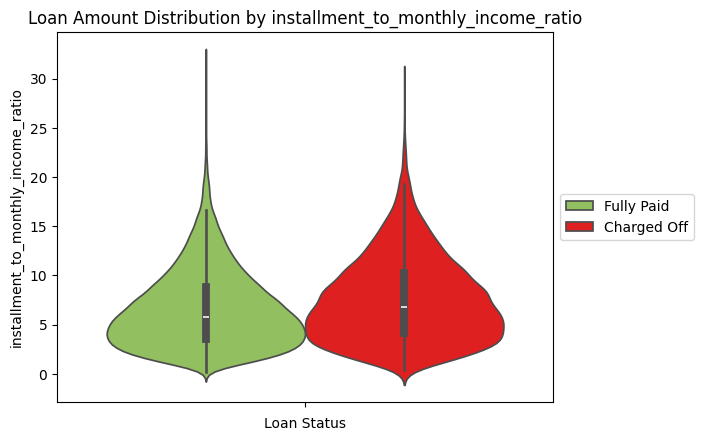

In [271]:
bva_numeric(col='installment_to_monthly_income_ratio', col_name='installment_to_monthly_income_ratio', data=df)

**This is a derived variable**

**Analysis:**
* Fully Paid: The distribution is generally skewed towards higher loan amounts, suggesting that borrowers with lower installment-to-monthly-income ratios tend to take on larger loans and are more likely to repay them in full.
* Charged Off: The distribution is more spread out, with a median loan amount that is lower than that of Fully Paid loans. This indicates that borrowers who default on their loans tend to have taken on smaller loans, on average.
* Median Loan Amount: The median loan amount for each loan status group can be compared to get a sense of the typical loan amount associated with each status.


**Inference:**
* Violin plot suggests that there is a **strong relationship** between installment-to-monthly-income ratio and loan status
* Higher Installment to monthly income ratio seems to indicate higher possibility of default
* Segment Installment to monthly income ratio variable and perform further analysis

---- Binning and analysing Numeric column "installment_to_monthly_income_ratio" ----




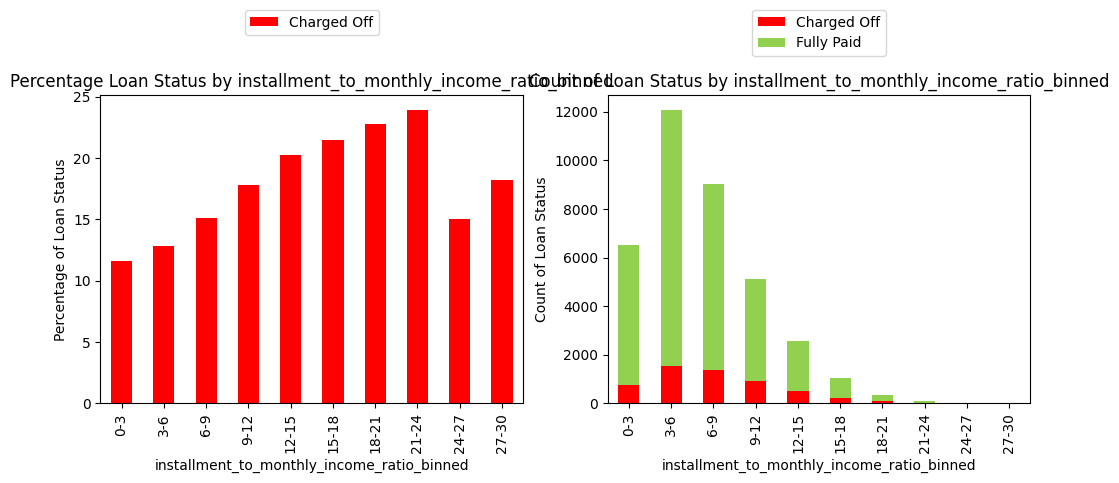

In [272]:
bva_segmented(col='installment_to_monthly_income_ratio', col_name='Intallment to Monthly Income ratio', edges=range(0,31,3), data=df)

**Analysis:**
* The count of fully paid loans generally decreases as the installment-to-monthly-income ratio binned increases. This is expected as borrowers with higher installment-to-monthly-income ratios have a higher proportion of their income committed to debt payments, which can make it more difficult to repay their loans in full.
* The count of charged-off loans is relatively high across all installment-to-monthly-income ratio bins, indicating that a significant number of borrowers, regardless of installment-to-monthly-income ratio level, are at risk of defaulting on their loans.
* The percentage of charged-off loans generally increases as the installment-to-monthly-income ratio binned increases. This suggests that borrowers with higher installment-to-monthly-income ratios are more likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans decreases slightly in certain installment-to-monthly-income ratio bins. This could be due to other factors influencing loan default, such as annual income or debt-to-income ratio.

**Inference:**
* There is a relationship between installment-to-monthly-income ratio and loan status.
* Borrowers with higher installment-to-monthly-income ratios are more likely to default on their loans, while those with lower installment-to-monthly-income ratios are more likely to repay their loans in full.
* **Debt to Installment to Monthly Income Ratio is a strong driving factor for loan default**

### Interest Rate

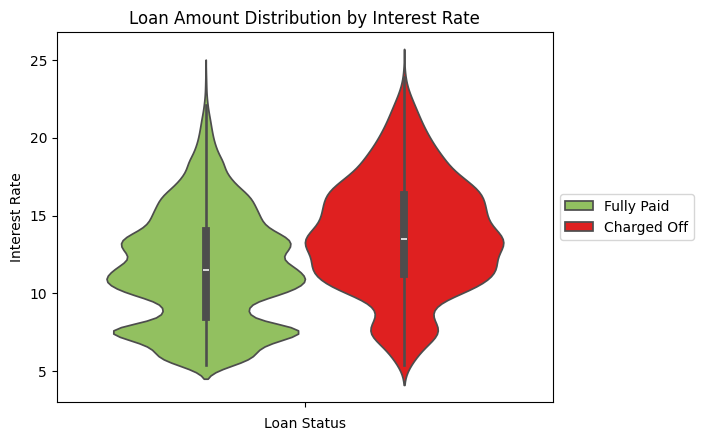

In [273]:
bva_numeric(col='int_rate', col_name='Interest Rate', data=df)

**Analysis:**
* **The shape of violins is distinctly different**
* Fully Paid: The distribution is generally skewed towards higher loan amounts, suggesting that borrowers with lower interest rates tend to take on larger loans and are more likely to repay them in full.
* Charged Off: The distribution is more spread out, with a median loan amount that is lower than that of Fully Paid loans. This indicates that borrowers who default on their loans tend to have taken on smaller loans, on average.
* Overlap: There is some overlap between the distributions of loan amounts for Fully Paid and Charged Off loans

**Inference:**
* violin plot suggests that there is a **very strong relationship** between interest rate and loan status.
* Segment Interest Rate to monthly income ratio variable and perform further analysis



---- Binning and analysing Numeric column "int_rate" ----




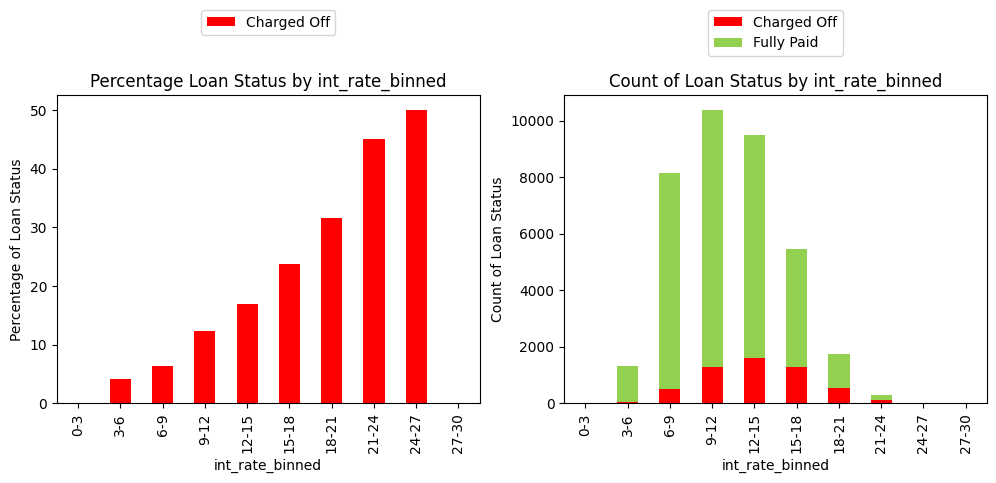

In [274]:
bva_segmented(col='int_rate', col_name='Interest Rate', edges=range(0,31,3), data=df)

**Analysis:**
* The count of fully paid loans generally decreases as the interest rate binned increases. This is expected as borrowers with higher interest rates have higher monthly payments, which can make it more difficult to repay their loans in full.
* The count of charged-off loans is relatively high across all interest rate bins, indicating that a significant number of borrowers, regardless of interest rate level, are at risk of defaulting on their loans.
* The percentage of charged-off loans generally increases as the interest rate binned increases. This suggests that borrowers with higher interest rates are more likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans decreases slightly in certain interest rate bins. This could be due to other factors influencing loan default, such as annual income or debt-to-income ratio.
* The probability of default increases with increase in interest rate

**Inference:**
* Analysis suggests that there is a strong relationship between interest rate and loan status.
* **Interest rate is a very strong driving factor for loan default**



### Revolving Utilization

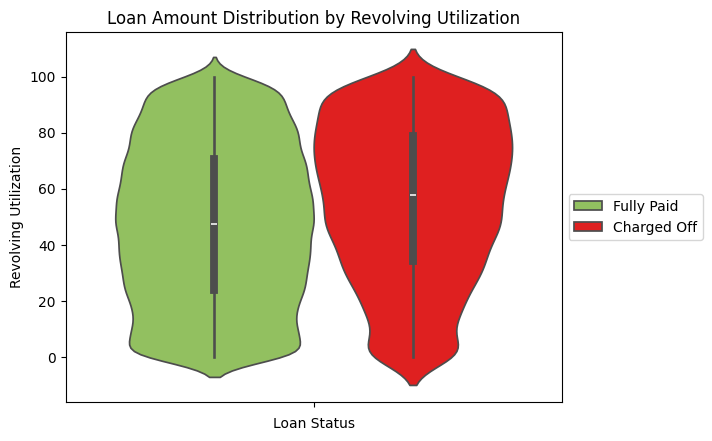

In [275]:
bva_numeric(col='revol_util', col_name='Revolving Utilization', data=df)

**Analysis:**
* **The shape of violins is distinctly different**
* Fully Paid: The distribution is generally skewed towards higher loan amounts, suggesting that borrowers with lower revolving utilization tend to take on larger loans and are more likely to repay them in full.
* Charged Off: The distribution is more spread out, with a median loan amount that is lower than that of Fully Paid loans. This indicates that borrowers who default on their loans tend to have taken on smaller loans, on average.


**Inference:**
* Violin plot suggests that there is a **very strong relationship** between revolving utilization and loan status
* Segment Revolving credit utilization and perform further analysis


---- Binning and analysing Numeric column "revol_util" ----




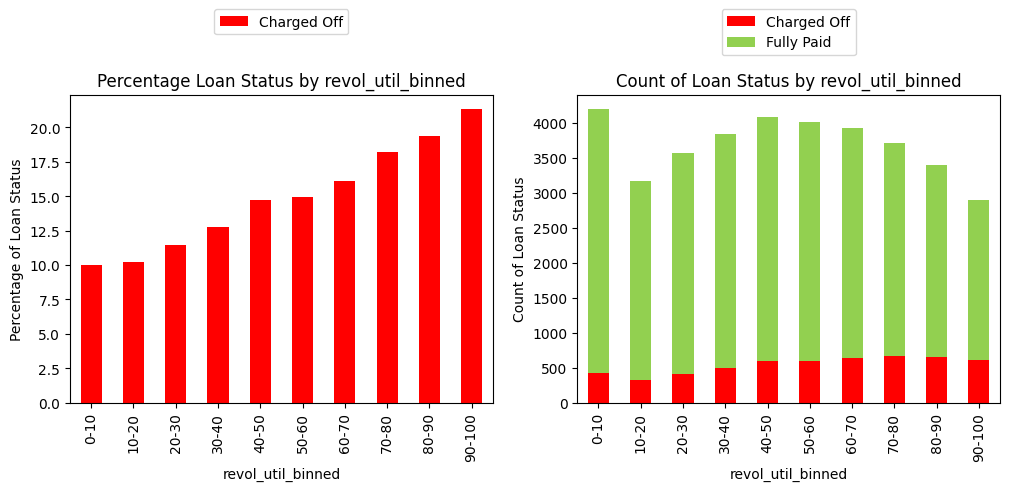

In [276]:
bva_segmented(col='revol_util', col_name='Revolving Utilization', edges=range(0,101,10), data=df)

**Analysis:**
* The count of fully paid loans generally decreases as the revolving utilization binned increases. This is expected as borrowers with higher revolving utilization have a higher proportion of their available credit being used, which can make it more difficult to repay their loans in full.
* The count of charged-off loans is relatively high across all revolving utilization bins, indicating that a significant number of borrowers, regardless of revolving utilization level, are at risk of defaulting on their loans.
* The percentage of charged-off loans generally increases as the revolving utilization binned increases. This suggests that borrowers with higher revolving utilization are more likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans decreases slightly in certain revolving utilization bins.

**Inference:**
* there is a very strong relationship relationship between revolving utilization and loan status
* **Interest rate is a very strong driving factor for loan default**

### Loan Amount

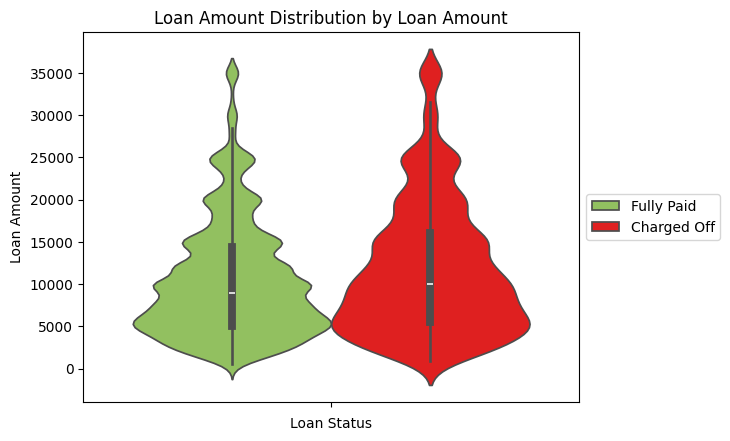

In [277]:
bva_numeric(col='loan_amnt', col_name='Loan Amount', data=df)

**Analysis:**
* Fully Paid: The violin plot is narrower and taller, with a more concentrated distribution of loan amounts. This suggests that borrowers who repay their loans in full tend to take on smaller loans.
* Charged Off: The violin plot is wider and shorter, with a more spread out distribution of loan amounts. This indicates that borrowers who default on their loans have a wider range of loan amounts, suggesting that their financial situations are more varied and potentially less stable.
* Median Loan Amount: The median loan amount for Fully Paid loans is lower than that for Charged Off loans, further reinforcing the observation that borrowers with smaller loans are more likely to repay them in full.

**Inference:**
* violin plot suggests that there is a weak relationship between loan amount and loan status
* Segment Loan amount and perform further analysis

---- Binning and analysing Numeric column "loan_amnt" ----




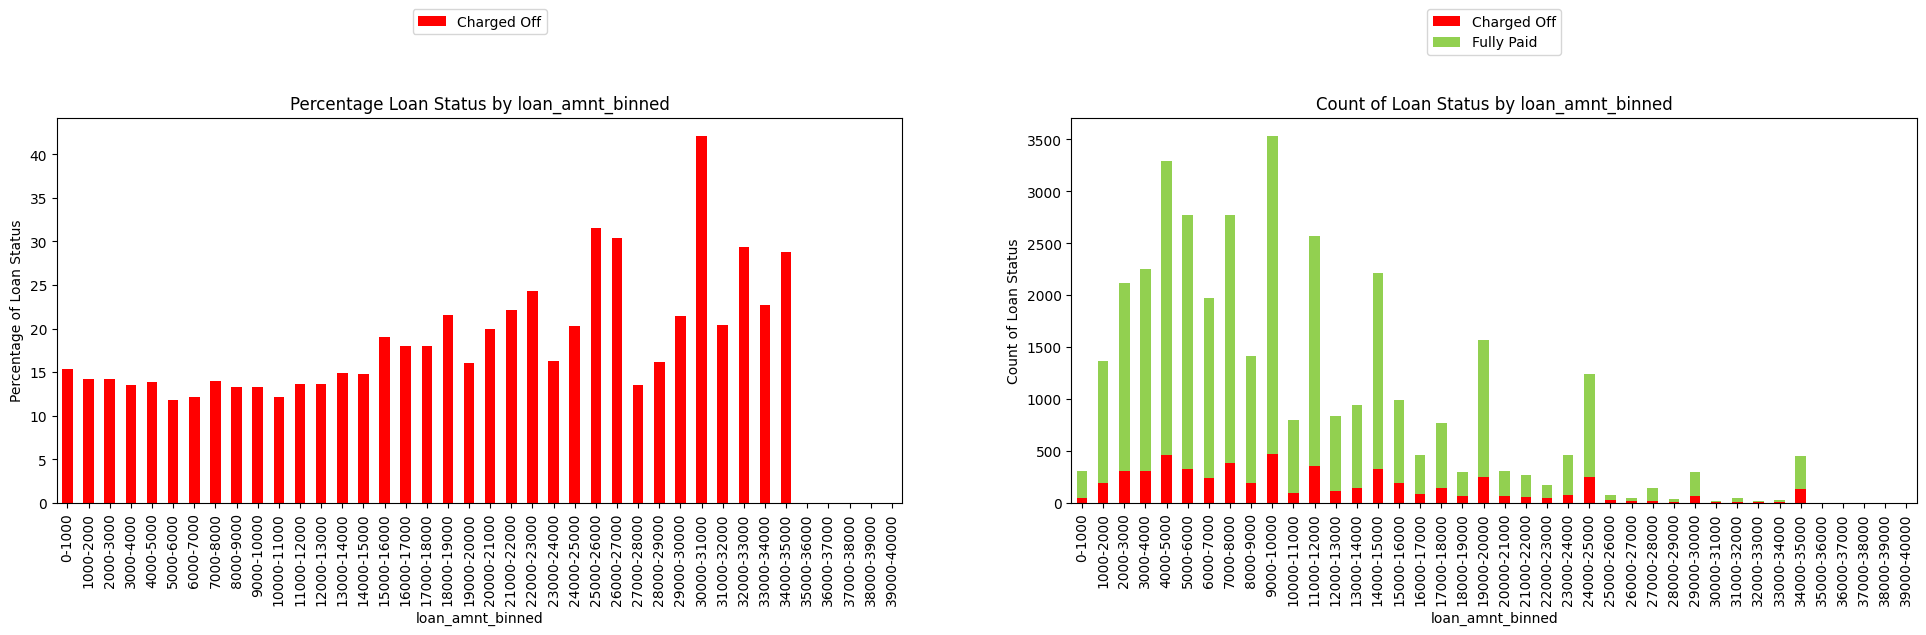

In [278]:
bva_segmented(col='loan_amnt', col_name='Loan Amount', edges=range(0,40001,1000), data=df, figsize=(24,5))

**Analysis:**
* The count of fully paid loans generally increases as the loan amount binned increases. This is expected as borrowers with larger loan amounts are more likely to have the financial resources to repay their loans in full.
* The count of charged-off loans is relatively low across all loan amount bins, indicating that most borrowers, regardless of loan amount level, are able to repay their loans.
* The percentage of charged-off loans generally decreases as the loan amount binned increases. This suggests that borrowers with larger loan amounts are less likely to default on their loans.
* There are a few exceptions to this trend, where the percentage of charged-off loans increases slightly in certain loan amount bins. This could be due to other factors influencing loan default, such as annual income or debt-to-income ratio.

**Inference:**
* analysis suggests that there is a moderate relationship between loan amount and loan status.
* Loan amount is a moderate driving factor in loan default.

# Correlation and Heat map

To visually represent the relationships between our most influential variables, let's create a correlation matrix and plot it as a heatmap. This will provide a visual confirmation of our earlier findings.

We will be performing this analysis for the below variables.


1. Grade
2. Sub_Grade
3. Term
4. Issue month
5. Annual Income
6. Debt to Income Ratio
7. Installment
8. Installment to Monthly Income Ratio
9. Interest Rate
10. Revolving credit utilization
11. Loan amount
12. Loan Status



Encode Loan Status

In [279]:
# Encode loan status
df['loan_status_encoded'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

Encode Categorical variables

In [280]:
# Encode loan grade
grade_mapping = {grade: i for i, grade in enumerate(sorted(df['grade'].unique()))}
df['grade_encoded'] = df['grade'].map(grade_mapping)

# Encode sub-grade
sub_grade_mapping = {sub_grade: i for i, sub_grade in enumerate(sorted(df['sub_grade'].unique()))}
df['sub_grade_encoded'] = df['sub_grade'].map(sub_grade_mapping)

# Encode term
term_mapping = {term: i for i, term in enumerate(sorted(df['term'].unique()))}
df['term_encoded'] = df['term'].map(term_mapping)


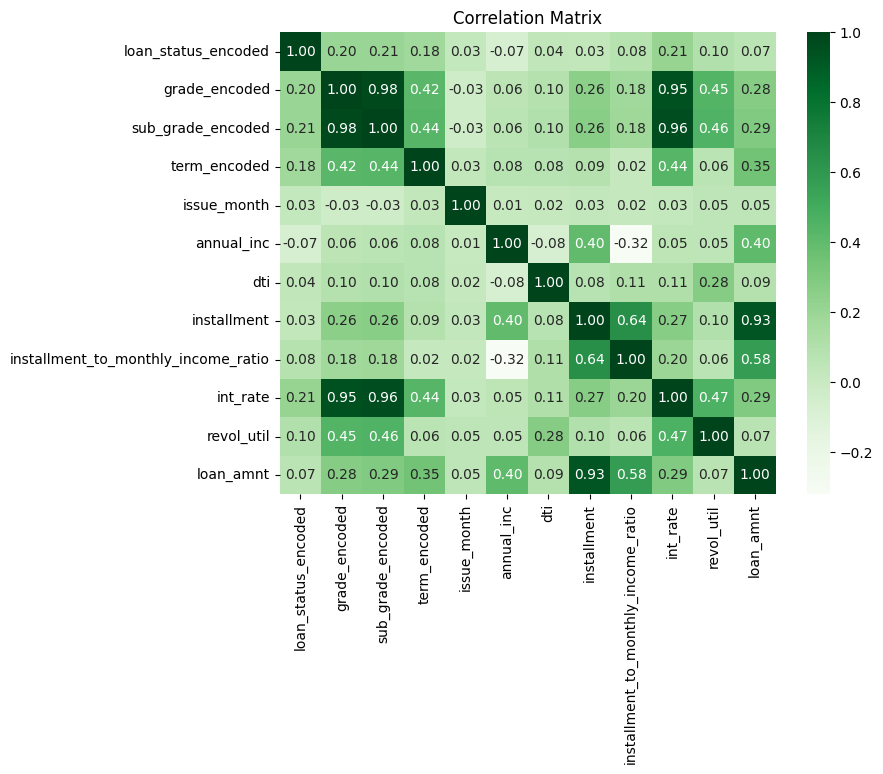

In [281]:
# Columns for corr()
columns_for_corr = ['loan_status_encoded', 'grade_encoded', 'sub_grade_encoded', 'term_encoded', 'issue_month', 'annual_inc', 'dti', 'installment', 'installment_to_monthly_income_ratio', 'int_rate', 'revol_util', 'loan_amnt']

# Create correlation matrix
correlation_matrix = df[columns_for_corr].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The heatmap provides a visual representation of the correlation between different variables in the dataset, with the target variable being loan_status_encoded. The colors in the heatmap indicate the strength and direction of the correlations:

Green: Positive correlation, meaning that as one variable increases, the other variable also tends to increase.
Red: Negative correlation, meaning that as one variable increases, the other variable tends to decrease.
White: No correlation, or a very weak correlation.

**Observations**
**Strong Positive Correlations with loan_status_encoded:**
* Grade and Sub_grade have strong positive correlations with Loan Status. This suggests that borrowers with lower grades and sub-grades are more likely to default on their loans.
* Interest Rate has a strong negative correlation with Loan Status. This indicates that borrowers with higher interest rates are less likely to default on their loans.

**Moderate Positive Correlations with loan_status_encoded:**
* Revolving Credit Utilization has a moderate positive correlation with Loan Status. This suggests that borrowers with higher revolving utilization are more likely to default on their loans.
* Installment to Monthly Income Ratio has a moderate positive correlation with Loan Status. This indicates that borrowers with higher Installment to Monthly Income Ratio ratios are more likely to default on their loans.

**Weak or No Correlations with loan_status_encoded:**
* Term, Issue Month, Annual Income, Debt to Income Ratio, and Loan Amount have weak or no correlations with Loan Status. This suggests that these variables may have limited influence on loan default.

**Overall, the heatmap confirms the findings from the previous bivariate analyses.**


# Multivariate Analysis

We will perform multivariate analysis using paris of variables that have most influence on Loan Status.

We will be using a Joingplot with KDE to create density contours and analyse the same. The contour lines represent the density of data points in different regions of the plot. Darker areas with contour lines packed together, indicate higher densities, while lighter areas with sparce contour lines, indicate lower densities.

## Revolving Credit Utilization and Interest rate

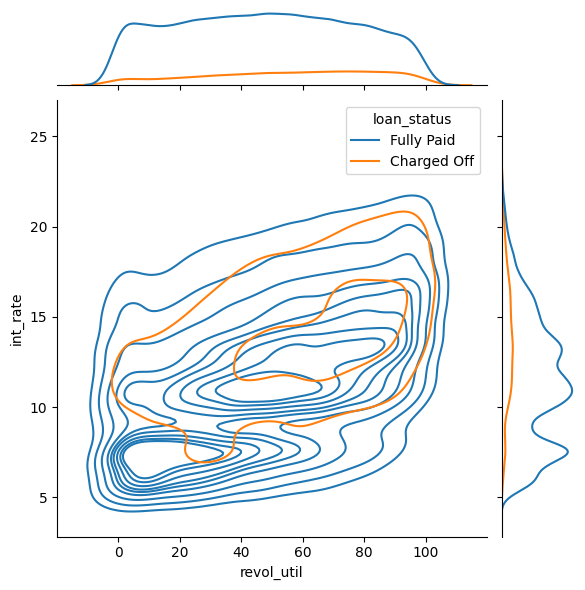

In [282]:
sns.jointplot(x='revol_util', y='int_rate', data=df, hue='loan_status', kind="kde")
plt.show()


**Analysis:**
* Distribution of Revolving Utilization: The marginal distribution of revolving utilization is shown along the bottom axis. It appears to be right-skewed, with a larger number of borrowers having lower revolving utilization.
* Distribution of Interest Rate: The marginal distribution of interest rate is shown along the right axis. It is also right-skewed, with a larger number of borrowers having lower interest rates.
* Overlap Between Loan Status Groups: There is significant overlap between the density contours for Fully Paid and Charged Off loans. This suggests that there is no clear separation between the two groups based on revolving utilization and interest rate alone.

**Inference:**
* While there is some overlap, there are subtle trends visible in the plot. For example, it seems like borrowers with higher revolving utilization might tend to have higher interest rates, especially among those who have been charged off.
* Overall, the joint density plot suggests that there is a relationship between revolving utilization, interest rate, and loan status.
* **This relationship can be used in to form a decently accurate predictor of loan default.** Note: That this pair pof varaibles in isolation would not give high accuracy in default prediction, but these can be the key variables.

## Annual Income and Interest Rate

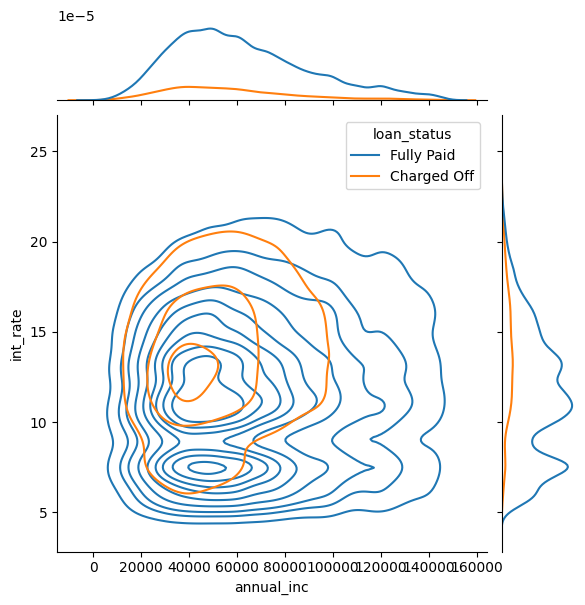

In [283]:
sns.jointplot(x='annual_inc', y='int_rate', data=df, hue='loan_status', kind="kde")
plt.show()

**Analysis:**
* Distribution of Annual Income: The marginal distribution of annual income is shown along the top axis. It appears to be right-skewed, with a larger number of borrowers having lower incomes.
* Distribution of Interest Rate: The marginal distribution of interest rate is shown along the right axis. It is also right-skewed, with a larger number of borrowers having lower interest rates.
* Overlap Between Loan Status Groups: There is significant overlap between the density contours for Fully Paid and Charged Off loans. This suggests that there is no clear separation between the two groups based on annual income and interest rate alone.

**Inference:**
* While there is some overlap, there might be subtle trends visible in the plot. For example, it seems like borrowers with higher annual incomes might tend to have lower interest rates, especially among those who have fully paid their loans. However, this trend is not very strong and may be influenced by other factors.
* Overall, the joint density plot suggests that there is a complex relationship between annual income, interest rate, and loan status.

## Installment to Monthly Income Ratio and Interest Rate

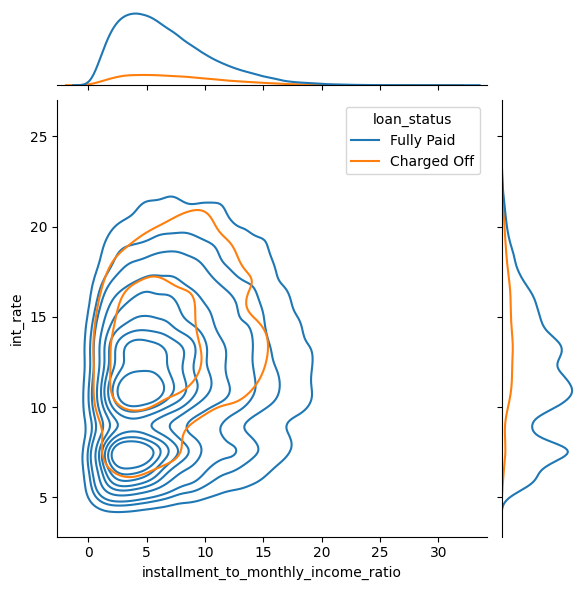

In [284]:
sns.jointplot(x='installment_to_monthly_income_ratio', y='int_rate', data=df, hue='loan_status', kind="kde")
plt.show()


**Analysis:**
* Distribution of Installment-to-Monthly-Income Ratio: The marginal distribution of installment-to-monthly-income ratio is shown along the bottom axis. It appears to be right-skewed, with a larger number of borrowers having lower ratios.
* Distribution of Interest Rate: The marginal distribution of interest rate is shown along the right axis. It is also right-skewed, with a larger number of borrowers having lower interest rates.
* Overlap Between Loan Status Groups: There is significant overlap between the density contours for Fully Paid and Charged Off loans. This suggests that there is no clear separation between the two groups based on installment-to-monthly-income ratio and interest rate alone.

**Inference:**
* While there is some overlap, there might be subtle trends visible in the plot. For example, it seems like borrowers with higher installment-to-monthly-income ratios might tend to have higher interest rates, especially among those who have been charged off.
* However, this trend is not very strong and may be influenced by other factors.

## Analyse Installment to Monthly Income Ratio by Grade and Loan Status

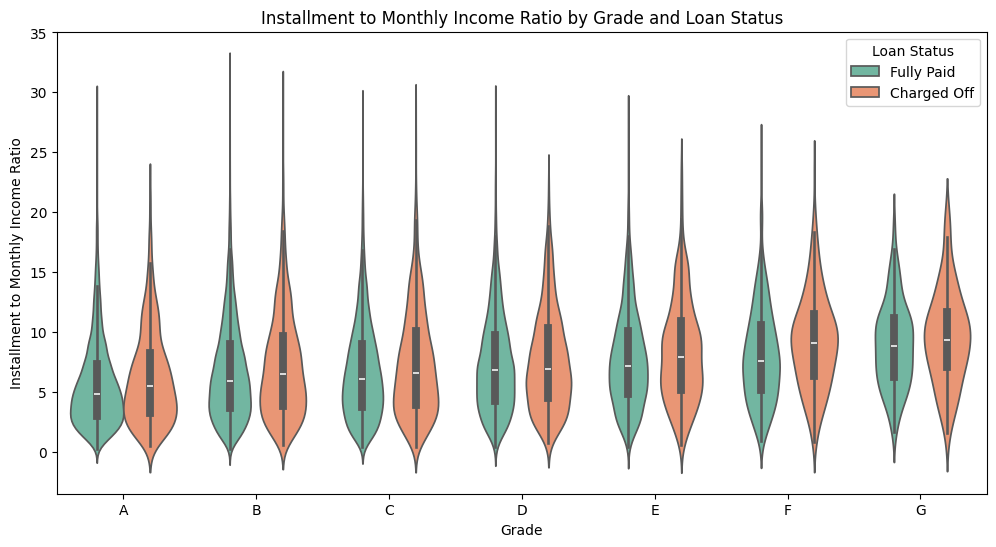

In [285]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='grade', y='installment_to_monthly_income_ratio', hue='loan_status', data=df.sort_values('grade'), palette='Set2')
plt.title('Installment to Monthly Income Ratio by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Installment to Monthly Income Ratio')
plt.legend(title='Loan Status')
plt.show()


The violin plot suggests that there is a relationship between installment-to-monthly-income ratio, loan status, and loan grade. Borrowers with lower IMRs are more likely to repay their loans in full, while those with higher IMRs are more likely to default. However, this relationship is not deterministic, and other factors must be considered to accurately predict loan default.

## Investigate defaults for loans issued around holidays

Please note that this section builds upon our previous univariate and bivariate analyses of Loan Purpose and Issue Month. To get the full context, refer to those sections above.

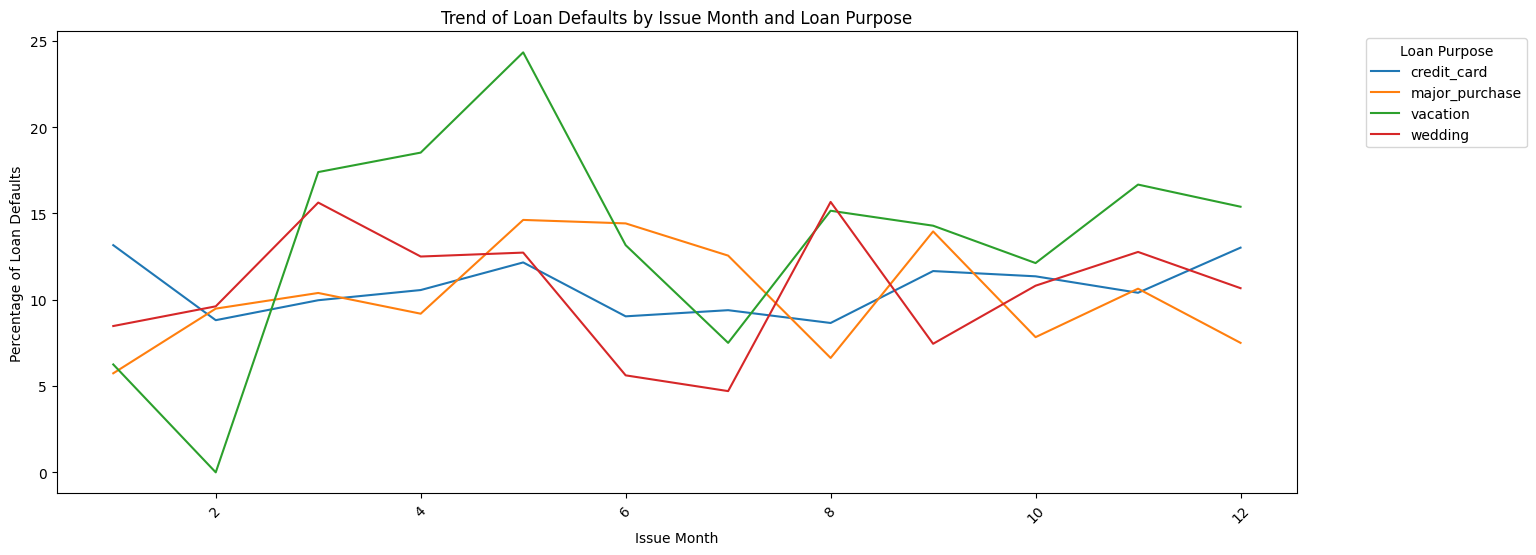

In [286]:
selected_purposes = ['credit_card', 'vacation', 'wedding', 'major_purchase']
df_selected = df[df['purpose'].isin(selected_purposes)]

# Group by issue month and loan purpose, calculate the percentage of defaults
df_grouped = df_selected.groupby(['issue_month', 'purpose'])['loan_status'].agg(lambda x: (x == 'Charged Off').mean() * 100).reset_index()

# Create a trend line graph
plt.figure(figsize=(16, 6))
sns.lineplot(x='issue_month', y='loan_status', hue='purpose', data=df_grouped)
plt.title('Trend of Loan Defaults by Issue Month and Loan Purpose')
plt.xlabel('Issue Month')
plt.ylabel('Percentage of Loan Defaults')
plt.xticks(rotation=45)
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Analysis:**
* Seasonality: There are noticeable seasonal patterns in loan defaults across different loan purposes:

  * Credit Card: Defaults peak in November and December, likely due to holiday spending and increased consumer debt.
  * Major Purchase: Defaults also show a peak in May and June, suggesting that larger purchases made during the holiday season may contribute to financial strain and increased default risk.
  * Vacation: Defaults tend to be lower during the holiday season but may increase in the summer months (May-June and September) due to vacation expenses. Note that Holiday time - Tahnksgiving and Christmas are colder months and are typically spent with family, whereas May_June are summer months when vacations are typically taken.
  * Wedding: Defaults appear to be relatively consistent throughout the year, with a slight increase in the summer months.
* Loan Purpose Comparison: Across all issue months, credit card and major purchase loans consistently have higher default rates than vacation and wedding loans. This suggests that these loan purposes may involve greater financial risk. Whereas there is definete seaonal up tick in the vacation loan defaults around May-June (Summer Break).


**Inference:**
* **Loan defaults are influenced by both seasonal factors and loan purpose.**
* **The vacation season (May-June) appears to be a particularly risky period for loan default Vacation loans loans.**